#                                         DATA SCIENCE

#                                     Project:  Stats and Politics Part 2

###                                written by Nataliya Parshyna

###                                    Date: February 15, 2021

## Table of contents

### 1. Introduction
### 2. Part I
### 3. Part II
### 4. Part III
### 5. Conclusion

## Introduction


    In this report, I will analyze the data from previous United States presidential elections. USA elections are held every four years, and I will explore data for 2012 and 2016.
    
    An election for president of the United States occurs every four years on the first Tuesday after the first Monday in November. The president and vice president are elected through a process called the Electoral College which is a compromise between a popular vote by citizens and a vote in Congress.  Before the general election, most candidates for president go through a series of state primaries and caucuses which let the states choose the major political parties’ nominees for the general election.
    
    The president must:
    
        -be a natural-born citizen of the United States, 
        -be at least 35 years old, 
        -have been a resident of the United States for 14 years. 
        
        Anyone who meets these requirements can declare their candidacy for president. Once a candidate raises or spends more than $5,000 for their campaign, they must register with the Federal Election Commission.


In [134]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
%matplotlib inline

###  Loading the data 

We are provided with 3 data files in CSV format from the presidential election campaigns: 2 data sets with votes for 2012 and 2016 years, and 1 data set with the demographic data. I will load all 3 data sets and take a look at those files.

In [135]:
# Load the data and take a look at the data

df_demographic_data = pd.read_csv('S&P_II_clean_demographic_data.csv')
df_demographic_data.head()

,state,county,FIPS,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,Alabama,Autauga,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Baldwin,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,Barbour,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,Bibb,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,Blount,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# Load the data and take a look at the data

df_votes_2012 = pd.read_csv('S&P_II_clean_presidential_2012_votes.csv')
df_votes_2012.head()

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
0,2012,Alabama,Autauga,1001,Barack Obama,democrat,6363.0,23932,26.800607
1,2012,Alabama,Autauga,1001,Mitt Romney,republican,17379.0,23932,73.199393
2,2012,Alabama,Baldwin,1003,Barack Obama,democrat,18424.0,85338,21.819043
3,2012,Alabama,Baldwin,1003,Mitt Romney,republican,66016.0,85338,78.180957
4,2012,Alabama,Barbour,1005,Barack Obama,democrat,5912.0,11509,51.579131


In [137]:
# Load the data and take a look at the data

df_votes_2016 = pd.read_csv('S&P_II_clean_presidential_2016_votes.csv')
df_votes_2016.head()

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
0,2016,Alabama,Autauga,1001,Hillary Clinton,democrat,5936.0,24973,24.622532
1,2016,Alabama,Autauga,1001,Donald Trump,republican,18172.0,24973,75.377468
2,2016,Alabama,Baldwin,1003,Hillary Clinton,democrat,18458.0,95215,20.207793
3,2016,Alabama,Baldwin,1003,Donald Trump,republican,72883.0,95215,79.792207
4,2016,Alabama,Barbour,1005,Hillary Clinton,democrat,4871.0,10469,47.176755


### Exploaring the data

Now I will join all 3 data sets.

In [138]:
# To join vote data sets (vertically):

pd.concat([df_votes_2012, df_votes_2016], axis = 0)

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
0,2012,Alabama,Autauga,1001,Barack Obama,democrat,6363.0,23932,26.800607
1,2012,Alabama,Autauga,1001,Mitt Romney,republican,17379.0,23932,73.199393
2,2012,Alabama,Baldwin,1003,Barack Obama,democrat,18424.0,85338,21.819043
3,2012,Alabama,Baldwin,1003,Mitt Romney,republican,66016.0,85338,78.180957
4,2012,Alabama,Barbour,1005,Barack Obama,democrat,5912.0,11509,51.579131
...,...,...,...,...,...,...,...,...,...
6303,2016,Alaska,District 39,2039,Donald Trump,republican,1405.0,5639,30.899494
6304,2016,Alaska,District 40,2040,Hillary Clinton,democrat,2338.0,4610,62.934051
6305,2016,Alaska,District 40,2040,Donald Trump,republican,1377.0,4610,37.065949
6306,2016,Alaska,District 99,2099,Hillary Clinton,democrat,274.0,5056,87.261146


In [139]:
# reset indexes

df_votes = pd.concat([df_votes_2012, df_votes_2016], axis = 0).reset_index(drop=True)

In [140]:
# take a look at data

df_votes

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
0,2012,Alabama,Autauga,1001,Barack Obama,democrat,6363.0,23932,26.800607
1,2012,Alabama,Autauga,1001,Mitt Romney,republican,17379.0,23932,73.199393
2,2012,Alabama,Baldwin,1003,Barack Obama,democrat,18424.0,85338,21.819043
3,2012,Alabama,Baldwin,1003,Mitt Romney,republican,66016.0,85338,78.180957
4,2012,Alabama,Barbour,1005,Barack Obama,democrat,5912.0,11509,51.579131
...,...,...,...,...,...,...,...,...,...
12611,2016,Alaska,District 39,2039,Donald Trump,republican,1405.0,5639,30.899494
12612,2016,Alaska,District 40,2040,Hillary Clinton,democrat,2338.0,4610,62.934051
12613,2016,Alaska,District 40,2040,Donald Trump,republican,1377.0,4610,37.065949
12614,2016,Alaska,District 99,2099,Hillary Clinton,democrat,274.0,5056,87.261146


In [141]:
# To join a vote data set and demographic data set:

df_presidential_data = pd.merge(df_votes, df_demographic_data, how='outer', on=['FIPS'])

In [142]:
df_presidential_data.head()

,year,state_x,county_x,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,state_y,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,2012,Alabama,Autauga,1001,Barack Obama,democrat,6363.0,23932,26.800607,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,Alabama,Autauga,1001,Mitt Romney,republican,17379.0,23932,73.199393,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Alabama,Autauga,1001,Hillary Clinton,democrat,5936.0,24973,24.622532,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,Alabama,Autauga,1001,Donald Trump,republican,18172.0,24973,75.377468,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,Alabama,Baldwin,1003,Barack Obama,democrat,18424.0,85338,21.819043,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# check how many rows and columns

df_presidential_data.shape

(12616, 25)

In [144]:
# Quickly check the data types

df_presidential_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12616 entries, 0 to 12615
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    12616 non-null  int64  
 1   state_x                                 12616 non-null  object 
 2   county_x                                12616 non-null  object 
 3   FIPS                                    12616 non-null  int64  
 4   candidate                               12616 non-null  object 
 5   party                                   12616 non-null  object 
 6   candidatevotes                          12616 non-null  float64
 7   totalvotes                              12616 non-null  int64  
 8   relative_votes                          12616 non-null  float64
 9   state_y                                 12440 non-null  object 
 10  county_y                                12440 non-null  ob

In [145]:
# Checking for duplicates

# Columns 

print(f'Duplicated columns: {df_presidential_data.T.duplicated().any()}')


Duplicated columns: False


In [146]:
# Checking for duplicates

# Rows 

print(f'Duplicated rows: {df_presidential_data.duplicated().any()}')

Duplicated rows: False


    We do not have duplicated rows or columns.

   However, some columns are dependant on the others: columns  'state_x', 'county_x', 'state_y', county_y'  are secondary columns to the column FISP (a unique code for each county), and if needed, we can extract information about states and counties from the FISP information. Thus, we will drop columns 'state_x', 'county_x', 'state_y', and 'county_y'.

In [147]:
df_presidential_data.drop(['state_x', 'county_x', 'state_y', 'county_y'], axis=1, inplace=True)

In [148]:
df_presidential_data.head()

,year,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,2012,1001,Barack Obama,democrat,6363.0,23932,26.800607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,1001,Mitt Romney,republican,17379.0,23932,73.199393,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1001,Hillary Clinton,democrat,5936.0,24973,24.622532,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1001,Donald Trump,republican,18172.0,24973,75.377468,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,1003,Barack Obama,democrat,18424.0,85338,21.819043,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# Checking for nulls

pd.DataFrame(df_presidential_data.isna().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
year,0
FIPS,0
candidate,0
party,0
candidatevotes,0
totalvotes,0
relative_votes,0
total_population,8884
citizen_voting_age_population,8884
white_pct,8884


In [150]:
# Checking for nulls in %

df_presidential_data.isna().sum()/df_presidential_data.shape[0]*100

year                                       0.000000
FIPS                                       0.000000
candidate                                  0.000000
party                                      0.000000
candidatevotes                             0.000000
totalvotes                                 0.000000
relative_votes                             0.000000
total_population                          70.418516
citizen_voting_age_population             70.418516
white_pct                                 70.418516
black_pct                                 70.418516
hispanic_pct                              70.418516
foreign_born_pct                          70.418516
female_pct                                70.418516
age_29_and_under_pct                      70.418516
age_65_and_older_pct                      70.418516
median_household_income                   70.418516
unemployed_pct_in_civilian_labor_force    70.418516
less_than_highschool_pct                  70.418516
less_than_co

In [151]:
# create a new data set where all NaN values are dropped (still preservind the original data)

df_presidential_data_clean = df_presidential_data.dropna()


In [152]:
df_presidential_data_clean.head()

,year,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
32,2012,1017,Barack Obama,democrat,6871.0,14611,47.396013,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
33,2012,1017,Mitt Romney,republican,7626.0,14611,52.603987,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
34,2016,1017,Hillary Clinton,democrat,5784.0,13900,42.445146,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
35,2016,1017,Donald Trump,republican,7843.0,13900,57.554854,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
36,2012,1019,Barack Obama,democrat,2132.0,9779,22.120772,25897.0,20505.0,91.871645,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273


In [153]:
# Checking for nulls in %

df_presidential_data_clean.isna().sum()/df_presidential_data_clean.shape[0]*100

year                                      0.0
FIPS                                      0.0
candidate                                 0.0
party                                     0.0
candidatevotes                            0.0
totalvotes                                0.0
relative_votes                            0.0
total_population                          0.0
citizen_voting_age_population             0.0
white_pct                                 0.0
black_pct                                 0.0
hispanic_pct                              0.0
foreign_born_pct                          0.0
female_pct                                0.0
age_29_and_under_pct                      0.0
age_65_and_older_pct                      0.0
median_household_income                   0.0
unemployed_pct_in_civilian_labor_force    0.0
less_than_highschool_pct                  0.0
less_than_college_pct                     0.0
rural population_pct                      0.0
dtype: float64

Now we have a clean data set without any NaN values.

In [154]:
df_presidential_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3732 entries, 32 to 12449
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    3732 non-null   int64  
 1   FIPS                                    3732 non-null   int64  
 2   candidate                               3732 non-null   object 
 3   party                                   3732 non-null   object 
 4   candidatevotes                          3732 non-null   float64
 5   totalvotes                              3732 non-null   int64  
 6   relative_votes                          3732 non-null   float64
 7   total_population                        3732 non-null   float64
 8   citizen_voting_age_population           3732 non-null   float64
 9   white_pct                               3732 non-null   float64
 10  black_pct                               3732 non-null   fl

In [155]:
# checking how many rows and columns

df_presidential_data_clean.shape

(3732, 21)

df_presidential_data_clean data set has 3732 rows and 21 columns.

In [156]:
df_presidential_data_clean

,year,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
32,2012,1017,Barack Obama,democrat,6871.0,14611,47.396013,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
33,2012,1017,Mitt Romney,republican,7626.0,14611,52.603987,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
34,2016,1017,Hillary Clinton,democrat,5784.0,13900,42.445146,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
35,2016,1017,Donald Trump,republican,7843.0,13900,57.554854,34018.0,26480.0,56.743489,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
36,2012,1019,Barack Obama,democrat,2132.0,9779,22.120772,25897.0,20505.0,91.871645,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12433,2016,56035,Donald Trump,republican,3409.0,4390,84.110535,10032.0,7470.0,91.646730,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
12446,2012,56043,Barack Obama,democrat,794.0,3944,20.850840,8351.0,6135.0,82.397318,...,13.962400,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,35.954529
12447,2012,56043,Mitt Romney,republican,3014.0,3944,79.149160,8351.0,6135.0,82.397318,...,13.962400,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,35.954529
12448,2016,56043,Hillary Clinton,democrat,532.0,3814,15.451641,8351.0,6135.0,82.397318,...,13.962400,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,35.954529


In [157]:
df_presidential_data_clean.columns

Index(['year', 'FIPS', 'candidate', 'party', 'candidatevotes', 'totalvotes',
       'relative_votes', 'total_population', 'citizen_voting_age_population',
       'white_pct', 'black_pct', 'hispanic_pct', 'foreign_born_pct',
       'female_pct', 'age_29_and_under_pct', 'age_65_and_older_pct',
       'median_household_income', 'unemployed_pct_in_civilian_labor_force',
       'less_than_highschool_pct', 'less_than_college_pct',
       'rural population_pct'],
      dtype='object')

We can quickly take a look at the df_presidential_data_clean important characteristics.

In [158]:
# use transpose method as it is easier to look at.

df_presidential_data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3732.0,2014.000000,2.000268,2012.000000,2012.000000,2014.000000,2016.000000,2.016000e+03
FIPS,3732.0,30448.295820,14986.810750,1017.000000,18133.000000,29211.000000,45049.000000,5.604300e+04
candidatevotes,3732.0,17263.308414,42725.122148,14.000000,2063.000000,4890.500000,12164.500000,5.790130e+05
totalvotes,3732.0,35857.986602,83482.571355,287.000000,5061.000000,10581.500000,24776.000000,8.319510e+05
relative_votes,3732.0,50.000000,20.795171,4.949054,32.482273,50.000000,67.517727,9.505095e+01
total_population,3732.0,85203.354770,211691.134070,425.000000,11907.000000,25046.000000,59950.000000,2.310011e+06
citizen_voting_age_population,3732.0,60543.033226,141663.693358,330.000000,9340.000000,19515.000000,43075.000000,1.383305e+06
white_pct,3732.0,77.836089,19.811621,2.776702,66.054156,85.697538,93.457944,9.962733e+01
black_pct,3732.0,8.792787,14.605937,0.000000,0.584361,2.012990,9.486829,7.553843e+01
hispanic_pct,3732.0,8.676989,13.552758,0.000000,1.908166,3.823285,8.257813,9.544607e+01


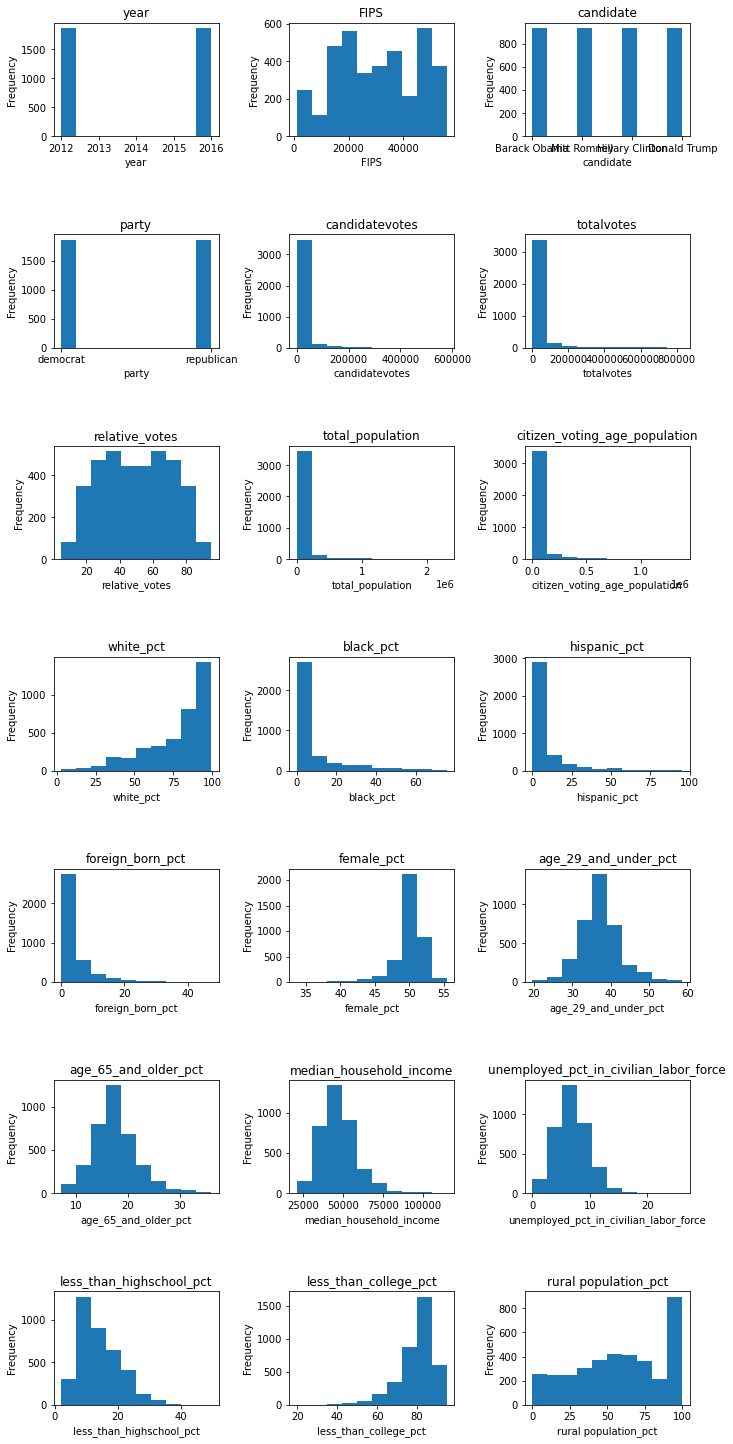

In [159]:

# Lets check out the distributions.

# Setting the plots layout
plt.subplots(7,3, figsize=(10,20))

# Plotting
for i, column in enumerate(df_presidential_data_clean, start=1):
    plt.subplot(7,3,i)
    plt.hist(df_presidential_data_clean[column])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()



    We can see 21 histograms roughly showing the distribution of our data.
     Here are some quick insights into our data:
     - Data is collected for two years: 2012 and 2016 years.
     - The distribution of FIPS (unique codes for counties) are not equal across states which make sense as states with larger populations have more counties
     -2 parties are participating in the elections: republicans and democrats, and 4 candidates: two candidates from each party in each shown year.
     - 'candidatevotes' and 'totalvotes' data is very similarly distributed.
     
      - *** Relative vote share is evenly distributed among democrats and republicans*** !!!
      
     -Among white, black, and Hispanic ethnicities the most voters are of white ethnicity.
     - A small percentage of voters are foreign-born.
     - About 50 percents of voters are women.
     -Interestingly, the data for voters who are younger than 29 years old or older than 65 years old is roughly normally distributed.
     - Same observation (normal distribution of data) is valid for median husehold income , unemployed_pct_in_civilian_labor_force,  less_than_highschool_pct, and less_than_college_pct data.
     

## Part I.

  In the first part of this report, We will find out which data columns are strongly or moderately correlated with the Republican vote share ***, and Which columns are not correlated at all. We will explore if this pattern appears in both elections. Finally, We will show if these correlations are statistically significant. 


    To find out results, we will build a correlation matrix where correlation coefficients are Pearson correlation coefficients  (r) that can take on values between -1 and 1. Then, knowing  Pearson correlation coefficients, we can calculate p-values.
    
    P-values and coefficients work together to show us which relationships in our model are statistically significant and the nature of those relationships. The coefficients describe the mathematical relationship between each independent variable and the dependent variable. The p-values for the coefficients indicate whether these relationships are statistically significant.


     The Pearson correlation coefficient is a measure of the linear association between two variables. This number helps us understand how strong a relationship is between two variables. The further away r is from zero, the stronger the relationship between the two variables. The Pearson correlation coefficient can be positive (+) indicating a positive relationship, or negative (-) indicating a negative relationship between variables.
     
Absolute value of r	Strength of relationship:

r < 0.25 - No relationship

0.25 < r < 0.5	- Weak relationship

0.5 < r < 0.75	- Moderate relationship

r > 0.75 - Strong relationship

    The correlation between the two variables is considered to be strong if the absolute value of r is greater than 0.75. However, the definition of a “strong” correlation can vary from one field to the next.
    As a rule of thumb, a correlation greater than 0.75 is considered to be a “strong” correlation between two variables.
However, this rule of thumb can vary from field to field. For example, a much lower correlation could be considered strong in a medical field compared to a technology field. 
    In this report, we will consider a correaltion to be strong when r>=0.75, to be wek when 0.25 <= r <= 0.5, and no relationship when r < 0.25.
    
(https://www.statology.org/what-is-a-strong-correlation/)

    After we find p-values, we can determine if the correlation is statistically significant or not. 
    The level of statistical significance is expressed as a p-value between 0 and 1. 
    We will develop 2 hypotheses: the Ho - null hypothesis, and Halt - an alternate hypothesis.
    The Ho in our case is there is no relationship between the variables being studied (one variable does not affect the others), and results are due to chance and are not significant. 
    The alternative hypothesis Halt is that the independent variable does affect the dependent variable, and the results are significant (i.e. not due to chance).
    The smaller the p-value, the stronger the evidence that we should reject the null hypothesis.
    A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the H0 is correct (and the results are random). Therefore, we reject the null hypothesis and accept the alternative hypothesis Halt.
    
(https://www.simplypsychology.org/p-value.html#:~:text=The%20level%20of%20statistical%20significance,%E2%89%A4%200.05)



    *** Even though we are interested in republican vote share only, we will preserve all data including democrat share votes based on the visual for votes share above.


First, we will build a correlation matrix. We will need to separate dependent and independent variables.

The independent variables (X) will be all columns in the df_presidential_data_clean data set except a column 'relative votes'. 
The dependent variable (y) is a column 'relative votes'.

In [160]:
# Separate the data into X and y variables

# X is the data containing the independent variables.

# y is the target.  The dependent variable.


X = df_presidential_data_clean.drop(columns='relative_votes')
y = df_presidential_data_clean['relative_votes']

In [161]:
# Checking the shape of X and y variables

print(f'Original data set had {df_presidential_data_clean.shape[0]} rows and {df_presidential_data_clean.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original data set had 3732 rows and 21 columns.
X has 3732 rows and 20 columns.
y has 3732 rows and 1 column.


In [162]:
# Correlation between independent variables
X_corr = X.corr()
X_corr


,year,FIPS,candidatevotes,totalvotes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
year,1.000000,0.000000,0.004778,0.012212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FIPS,0.000000,1.000000,-0.000302,0.000152,0.009098,0.005158,0.000938,-0.143132,0.111520,0.010802,-0.023242,-0.027308,0.053773,0.101872,-0.157879,-0.017118,-0.048220,0.000565
candidatevotes,0.004778,-0.000302,1.000000,0.941470,0.922860,0.929627,-0.225589,0.104502,0.143230,0.526512,0.159780,0.140199,-0.258300,0.365983,0.016228,-0.148835,-0.448764,-0.487284
totalvotes,0.012212,0.000152,0.941470,1.000000,0.979789,0.987101,-0.238047,0.108201,0.152465,0.558498,0.168768,0.150002,-0.275221,0.391271,0.015746,-0.159789,-0.478791,-0.518018
total_population,0.000000,0.009098,0.922860,0.979789,1.000000,0.996531,-0.265520,0.108339,0.185945,0.582962,0.154042,0.170000,-0.283008,0.344496,0.027858,-0.113814,-0.425942,-0.494773
citizen_voting_age_population,0.000000,0.005158,0.929627,0.987101,0.996531,1.000000,-0.255620,0.112145,0.170119,0.564972,0.162174,0.164730,-0.281172,0.352328,0.028960,-0.129318,-0.439311,-0.507563
white_pct,0.000000,0.000938,-0.225589,-0.238047,-0.265520,-0.255620,1.000000,-0.622416,-0.595445,-0.496407,0.012581,-0.434167,0.371427,0.167044,-0.441003,-0.502906,-0.032551,0.292139
black_pct,0.000000,-0.143132,0.104502,0.108201,0.108339,0.112145,-0.622416,1.000000,-0.118687,-0.004336,0.075404,0.152445,-0.210386,-0.309366,0.474345,0.362509,0.125704,-0.108268
hispanic_pct,0.000000,0.111520,0.143230,0.152465,0.185945,0.170119,-0.595445,-0.118687,1.000000,0.643175,-0.093274,0.307456,-0.194318,0.063710,0.025010,0.351931,-0.017954,-0.249578
foreign_born_pct,0.000000,0.010802,0.526512,0.558498,0.582962,0.564972,-0.496407,-0.004336,0.643175,1.000000,-0.023570,0.313627,-0.333765,0.348971,-0.009198,0.169079,-0.377257,-0.477576


    A correlation matrix is a table showing correlation coefficients between sets of variables. Each variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation. Correlation falls on a range of [-1,1]:
    
- -1 indicates a perfect negative correlation relationship.
- 0 indicates no correlation relationship.
- and 1 indicates a perfect positive correlation relationship.

    Large tables like this are hard to parse through, let's visualize the correlation using a heatmap.

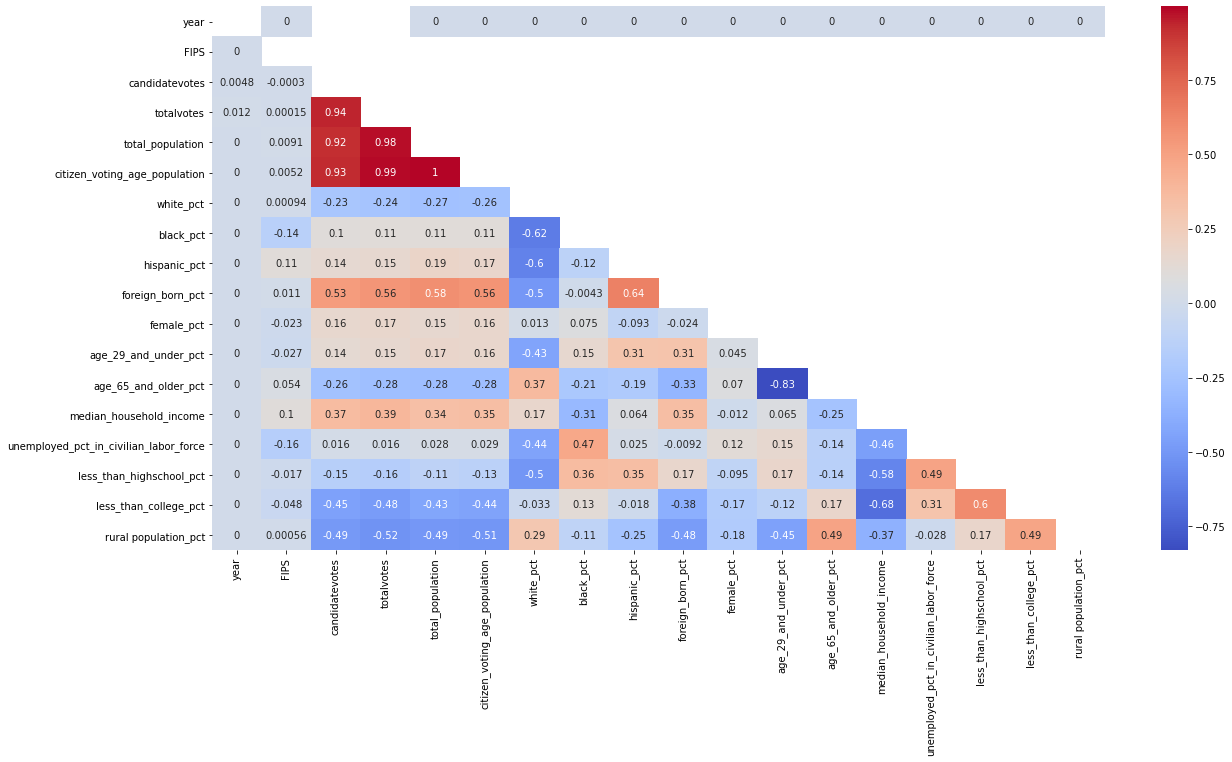

In [163]:
# Correlation of the variables in a heatmap
# As we know the matrix is symmetrical, so we can use 'triu' function to visualize just the half of the matrix
# i.e. less information for us to analyze 

plt.figure(figsize=(20,10))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

    Let us analyze the above heatmap and see what correlation coefficients are high, moderate, and low.

r > 0.75 :

Strong positive correlation: 

- totalvotes - candidatevotes
- total_population - candidatevotes
- citizen_voting _age_population - candidatevotes
- total_population - totalvotes
- citizen_voting _age_population - totalvotes
- citizen_voting _age_population - total_population (1!!!) - they probably have exactly the same information
 


Strong negative correlation: 

- age_65_and_older_pct - age_29_and_under_pct


0.5 < r < 0.75 - Moderate correlation


Moderate positive correlation:
- foreign_born_pct - totalvotes
- foreign_born_pct - total_population
- foreign_born_pct -  citizen_voting _age_population
- foreign_born_pct  - hispanic_pct
- less_than_college_pct - less_than_highschool_pct
   
Moderate negative correlation: 

- black_pct - white_pct
- hispanic_pct  - white_pct
- foreign_born_pct - white_pct
- less_than_highschool_pct - white_pct
- rural population_pct - candidatevotes	
- rural population_pct - totalvotes
- rural population_pct - citizen_voting _age_population
- less_than_highschool_pct - median_household_income
- less_than_college_pct - median_household_income


r < 0.25 - No correlation 

    column 'year" is not correlated with 'relative_votes' information. Thus, there is no correlation between the year of voting and votes for the republican party.
    Also, the column 'FISP" has almost 0 correlation with the votes for the republicans.
    There is almost no correlation between median_household_income and gender (female_pct column), between rural population_pct and unemployed_pct_in_civilian_labor_force, and between age_65_and_older_pct and female_pct.



    The correlation matrix is composed of the Pearson's coefficients. To find out if correlations are statistically significant, we need to find p-values for each coefficient.

In [165]:

#Get p-values using t-test
# n=3732 - number of samples (number of rows)

n=3732
r=X_corr
t=r*np.sqrt((n-2)/(1-r*r))
import scipy.stats as ss
ss.t.cdf(t, n-2)

array([[1.00000000e+000, 5.00000000e-001, 6.14773244e-001,
        7.72114057e-001, 5.00000000e-001, 5.00000000e-001,
        5.00000000e-001, 5.00000000e-001, 5.00000000e-001,
        5.00000000e-001, 5.00000000e-001, 5.00000000e-001,
        5.00000000e-001, 5.00000000e-001, 5.00000000e-001,
        5.00000000e-001, 5.00000000e-001, 5.00000000e-001],
       [5.00000000e-001, 1.00000000e+000, 4.92639720e-001,
        5.03712917e-001, 7.10756560e-001, 6.23607774e-001,
        5.22830785e-001, 7.72875613e-019, 1.00000000e+000,
        7.45265292e-001, 7.78685982e-002, 4.76589894e-002,
        9.99492391e-001, 1.00000000e+000, 1.47103456e-022,
        1.47897648e-001, 1.60688200e-003, 5.13755823e-001],
       [6.14773244e-001, 4.92639720e-001, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.42803420e-044, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        2.98263975e-058, 1.00000000e+000, 8.39178386e-

  We were able to calculate p-values but the downside - we cannot read them and understand which p-value belongs to which person's coefficient.

    Let us use a method built in scipy.stats. It is called a pearsonr function.

    Now we will find p-values for strongly correlated columns.

In [166]:
from scipy.stats import pearsonr

# Examine columns 'totalvotes' and 'candidatevotes'

df_presidential_data_clean_1 = df_presidential_data_clean[['totalvotes', 'candidatevotes']].dropna()
pearsonr(df_presidential_data_clean['totalvotes'], df_presidential_data_clean['candidatevotes'])

(0.9414696831280359, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'totalvotes' affects  'candidatevotes', and the results are significant (i.e. not due to chance).

In [167]:
# Examine columns 'total_population' and 'candidatevotes'

df_presidential_data_clean_2 = df_presidential_data_clean[['total_population', 'candidatevotes']].dropna()
pearsonr(df_presidential_data_clean['total_population'], df_presidential_data_clean['candidatevotes'])

(0.9228598985404682, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'total_population' affects  'candidatevotes', and the results are significant. 

In [168]:
# Examine columns 'citizen_voting_age_population' and 'candidatevotes'

df_presidential_data_clean_3 = df_presidential_data_clean[['citizen_voting_age_population', 'candidatevotes']].dropna()
pearsonr(df_presidential_data_clean['citizen_voting_age_population'], df_presidential_data_clean['candidatevotes'])

(0.9296274470789546, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'citizen_voting_age_population' affects  'candidatevotes', and the results are significant. 

In [169]:
# Examine columns 'total_population' and 'totalvotes'

df_presidential_data_clean_4 = df_presidential_data_clean[['total_population', 'totalvotes']].dropna()
pearsonr(df_presidential_data_clean['total_population'], df_presidential_data_clean['totalvotes'])

(0.9797893853943254, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'total_population' affects  'totalvotes', and the results are significant. 

In [170]:
# Examine columns 'citizen_voting_age_population' and 'totalvotes'

df_presidential_data_clean_5 = df_presidential_data_clean[['citizen_voting_age_population', 'totalvotes']].dropna()
pearsonr(df_presidential_data_clean['citizen_voting_age_population'], df_presidential_data_clean['totalvotes'])

(0.9871010587842253, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'citizen_voting_age_population' affects  'totalvotes', and the results are significant. 

In [171]:
# Examine columns 'citizen_voting_age_population' and 'total_population'

df_presidential_data_clean_6 = df_presidential_data_clean[['citizen_voting_age_population', 'total_population']].dropna()
pearsonr(df_presidential_data_clean['citizen_voting_age_population'], df_presidential_data_clean['total_population'])

(0.996531423156958, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'citizen_voting_age_population' affects  'total_population', and the results are significant. 

In [172]:
# Examine columns 'age_65_and_older_pct' and 'age_29_and_under_pct'

df_presidential_data_clean_7 = df_presidential_data_clean[['age_65_and_older_pct', 'age_29_and_under_pct']].dropna()
pearsonr(df_presidential_data_clean['age_65_and_older_pct'], df_presidential_data_clean['age_29_and_under_pct'])

(-0.8291125221979054, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'age_65_and_older_pct' affects  'age_29_and_under_pct', and the results are significant. 

   Now I will find p-values for moderately correlated columns.

In [173]:
# Examine columns 'foreign_born_pct' and 'totalvotes'

df_presidential_data_clean_8 = df_presidential_data_clean[['foreign_born_pct', 'totalvotes']].dropna()
pearsonr(df_presidential_data_clean['foreign_born_pct'], df_presidential_data_clean['totalvotes'])

(0.5584975182905609, 3.6813459601432463e-305)

p=3.6813459601432463e-305 (<0.05). We can reject Ho and conclude that 'foreign_born_pct' affects  'totalvotes', and the results are significant. 

In [174]:
# Examine columns 'foreign_born_pct' and 'total_population'

df_presidential_data_clean_9 = df_presidential_data_clean[['foreign_born_pct', 'total_population']].dropna()
pearsonr(df_presidential_data_clean['foreign_born_pct'], df_presidential_data_clean['total_population'])

(0.5829622088620239, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'foreign_born_pct' affects  'total_population', and the results are significant. 

In [175]:
# Examine columns 'foreign_born_pct' and 'citizen_voting_age_population'

df_presidential_data_clean_10 = df_presidential_data_clean[['foreign_born_pct', 'citizen_voting_age_population']].dropna()
pearsonr(df_presidential_data_clean['foreign_born_pct'], df_presidential_data_clean['citizen_voting_age_population'])

(0.5649717038126214, 8.985333434e-314)

p=8.985333434e-314 (<0.05). We can reject Ho and conclude that 'foreign_born_pct' affects  'citizen_voting_age_population', and the results are significant. 

In [176]:
# Examine columns 'foreign_born_pct' and 'hispanic_pct'

df_presidential_data_clean_11 = df_presidential_data_clean[['foreign_born_pct', 'hispanic_pct']].dropna()
pearsonr(df_presidential_data_clean['foreign_born_pct'], df_presidential_data_clean['hispanic_pct'])

(0.6431751116848372, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'foreign_born_pct' affects  'hispanic_pct', and the results are significant. 

In [177]:
# Examine columns 'less_than_college_pct' and 'less_than_highschool_pct'

df_presidential_data_clean_12 = df_presidential_data_clean[['less_than_college_pct', 'less_than_highschool_pct']].dropna()
pearsonr(df_presidential_data_clean['less_than_college_pct'], df_presidential_data_clean['less_than_highschool_pct'])

(0.5989532279329344, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'less_than_college_pct' affects  'less_than_highschool_pct', and the results are significant. 

In [178]:
# Examine columns 'black_pct' and 'white_pct'

df_presidential_data_clean_13 = df_presidential_data_clean[['black_pct', 'white_pct']].dropna()
pearsonr(df_presidential_data_clean['black_pct'], df_presidential_data_clean['white_pct'])

(-0.6224161249587918, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'black_pct' affects  'white_pct', and the results are significant. 

In [179]:
# Examine columns 'hispanic_pct' and 'white_pct'

df_presidential_data_clean_14 = df_presidential_data_clean[['hispanic_pct', 'white_pct']].dropna()
pearsonr(df_presidential_data_clean['hispanic_pct'], df_presidential_data_clean['white_pct'])

(-0.5954451730574963, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'hispanic_pct' affects  'white_pct', and the results are significant. 

In [180]:
# Examine columns 'foreign_born_pct' and 'white_pct'

df_presidential_data_clean_15 = df_presidential_data_clean[['foreign_born_pct', 'white_pct']].dropna()
pearsonr(df_presidential_data_clean['foreign_born_pct'], df_presidential_data_clean['white_pct'])

(-0.496407317902792, 1.8445249083491207e-231)

p=1.8445249083491207e-231 (<0.05). We can reject Ho and conclude that 'foreign_born_pct' affects  'white_pct', and the results are significant. 

In [181]:
# Examine columns 'less_than_highschool_pct' and 'white_pct'

df_presidential_data_clean_16 = df_presidential_data_clean[['less_than_highschool_pct', 'white_pct']].dropna()
pearsonr(df_presidential_data_clean['less_than_highschool_pct'], df_presidential_data_clean['white_pct'])

(-0.5029061107839535, 1.7774148765835455e-238)

p=1.7774148765835455e-238 (<0.05). We can reject Ho and conclude that 'less_than_highschool_pct' affects  'white_pct', and the results are significant. 

In [182]:
# Examine columns 'rural population_pct' and 'candidatevotes'

df_presidential_data_clean_17 = df_presidential_data_clean[['rural population_pct', 'candidatevotes']].dropna()
pearsonr(df_presidential_data_clean['rural population_pct'], df_presidential_data_clean['candidatevotes'])

(-0.4872844309878406, 7.285388451816774e-222)

p=7.285388451816774e-222 (<0.05). We can reject Ho and conclude that 'rural population_pct' affects  'candidatevotes', and the results are significant. 

In [183]:
# Examine columns 'rural population_pct' and 'totalvotes'

df_presidential_data_clean_18 = df_presidential_data_clean[['rural population_pct', 'totalvotes']].dropna()
pearsonr(df_presidential_data_clean['rural population_pct'], df_presidential_data_clean['totalvotes'])

(-0.5180183708989884, 2.162249191614907e-255)

p=2.162249191614907e-255 (<0.05). We can reject Ho and conclude that 'rural population_pct' affects  'totalvotes', and the results are significant. 

In [184]:
# Examine columns 'rural population_pct' and 'citizen_voting_age_population'

df_presidential_data_clean_19 = df_presidential_data_clean[['rural population_pct', 'citizen_voting_age_population']].dropna()
pearsonr(df_presidential_data_clean['rural population_pct'], df_presidential_data_clean['citizen_voting_age_population'])

(-0.5075626126991588, 1.34408010825246e-243)

p=1.34408010825246e-243 (<0.05). We can reject Ho and conclude that 'rural population_pct' affects  'citizen_voting_age_population', and the results are significant. 

In [185]:
# Examine columns 'less_than_highschool_pct' and 'median_household_income'

df_presidential_data_clean_20 = df_presidential_data_clean[['less_than_highschool_pct', 'median_household_income']].dropna()
pearsonr(df_presidential_data_clean['less_than_highschool_pct'], df_presidential_data_clean['median_household_income'])

(-0.5833841151453538, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'less_than_highschool_pct' affects  'median_household_income', and the results are significant. 

In [186]:
# Examine columns 'less_than_college_pct' and 'median_household_income'

df_presidential_data_clean_21 = df_presidential_data_clean[['less_than_college_pct', 'median_household_income']].dropna()
pearsonr(df_presidential_data_clean['less_than_college_pct'], df_presidential_data_clean['median_household_income'])

(-0.6798841515902511, 0.0)

p=0.0 (<0.05). We can reject Ho and conclude that 'less_than_college_pct' affects  'median_household_income', and the results are significant. 

 In the first part of this report, we showed which data columns are strongly or moderately correlated with the Republican vote share, and which columns are not correlated at all. We showed that the year when elections are held, does not correlate with the relative vote share for republicans or another party. Finally, we found that these correlations are all statistically significant. 


## Part II.

  In the second part of this report, we will analyze the results of a poll of voting preferences for the 2016 US Election.
The sample size for the poll was 2,133. The sample was taken from eligible voters in the states of Florida and Pennsylvania.
    Out of 1,042 respondents in Florida, approximately 46.84% would vote for the Democrats, and 45.22% for the Republicans
    Out of 1,091 respondents in Pennsylvania, approximately 48.94% would be voting for the Democrats, and 41.2% for the Republicans
    We will run a hypothesis test to see whether voters' location is independent of their voting preference. 



    The data we want to make inferences about is categorical, so we use a Chi-Squared test.

    My hypothesizes are:

    𝐻0: There is no relationship between the voters' location and their voting preference. (They are independent.)

    𝐻1: There is some relationship between the voters' location and their voting preference. (They are not independent.)

    Assumptions of the Chi-Squared Test:

 - The data in the cells should be frequencies.
 - The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
 - Each subject may contribute data to one and only one cell.
 - The study groups must be independent.

 



   We will calculate the number of democrats and republicans in Florida and Pennsylvania given the percentages of democrats and republicans in these states. 

Florida: 1042 persons, 46.84% -  democrats - 488 people, 45.22 % - republicans, 471 people;

Pennsylvania: 1,091 persons, 48.94% -  democrats - 534, 41.2% - republicans - 449.

Let us build a data frame based on the above information.

In [187]:
data = {'Democtrats': [488,534], 'Republicans':[471,449]}


In [188]:
df = pd.DataFrame(data, index=['Florida', 'Pennsylvania'])
display(df)

,Democtrats,Republicans
Florida,488,471
Pennsylvania,534,449


Now we will run a Chi-Squared test  and assess the p-value for significance. If p-value is less than 0.05 (typically ≤ 0.05), it is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the H0 is correct (and the results are random). Therefore, we can reject the null hypothesis and accept the alternative hypothesis H1. If p-value >0.05, we cannot reject the null hypothesis.

In [189]:
stats.chi2_contingency(df)

(2.1644859679300366,
 0.14123184330998928,
 1,
 array([[504.68486097, 454.31513903],
        [517.31513903, 465.68486097]]))

    The p-value is  0.14123184330998928. It is above the 5% threshold (14.1%). The test is inconclusive. We cannot reject the null hypothesis. We cannot state that there is some relationship between the voters' location and their voting preference. We cannot state these variables are not independent.

## Part III.

  In the third part of this report, We will fit and optimize linear regression and logistic regression models that predict 2016 relative vote share of the Republican party within a county using the county-level demographic data. For each model, we will answer the following questions:

    -What are the independent and dependent variables in this case? Which independent variables are most positively and negatively predictive?
    -How good is the fit of your model? 
We will see what metric is a good measure to evaluate our models.

    Since we are interested only in 2016 votes share information, we will analyze a merged data set consisting of the df_votes_2016 and df_demographic_data sets.

In [190]:
# merging data frames

df_presidential_data1 = pd.merge(df_votes_2016, df_demographic_data, how='outer', on=['FIPS'])

In [191]:
df_presidential_data1

,year,state_x,county_x,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,state_y,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,2016,Alabama,Autauga,1001,Hillary Clinton,democrat,5936.0,24973,24.622532,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,Alabama,Autauga,1001,Donald Trump,republican,18172.0,24973,75.377468,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Alabama,Baldwin,1003,Hillary Clinton,democrat,18458.0,95215,20.207793,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,Alabama,Baldwin,1003,Donald Trump,republican,72883.0,95215,79.792207,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,Alabama,Barbour,1005,Hillary Clinton,democrat,4871.0,10469,47.176755,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2016,Alaska,District 39,2039,Donald Trump,republican,1405.0,5639,30.899494,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,2016,Alaska,District 40,2040,Hillary Clinton,democrat,2338.0,4610,62.934051,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,2016,Alaska,District 40,2040,Donald Trump,republican,1377.0,4610,37.065949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,2016,Alaska,District 99,2099,Hillary Clinton,democrat,274.0,5056,87.261146,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# we will dropp all the rows with null values.


df_presidential_data1_clean = df_presidential_data1.dropna()

In [193]:
df_presidential_data1_clean

,year,state_x,county_x,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,state_y,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
16,2016,Alabama,Chambers,1017,Hillary Clinton,democrat,5784.0,13900,42.445146,Alabama,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
17,2016,Alabama,Chambers,1017,Donald Trump,republican,7843.0,13900,57.554854,Alabama,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
18,2016,Alabama,Cherokee,1019,Hillary Clinton,democrat,1547.0,10733,14.733333,Alabama,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
19,2016,Alabama,Cherokee,1019,Donald Trump,republican,8953.0,10733,85.266667,Alabama,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
24,2016,Alabama,Clarke,1025,Hillary Clinton,democrat,5749.0,13031,44.603926,Alabama,...,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,2016,Wyoming,Park,56029,Donald Trump,republican,11115.0,15095,81.428571,Wyoming,...,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
6214,2016,Wyoming,Sublette,56035,Hillary Clinton,democrat,644.0,4390,15.889465,Wyoming,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
6215,2016,Wyoming,Sublette,56035,Donald Trump,republican,3409.0,4390,84.110535,Wyoming,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
6222,2016,Wyoming,Washakie,56043,Hillary Clinton,democrat,532.0,3814,15.451641,Wyoming,...,13.962400,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,35.954529


In [194]:
# We will keep only rows with republican votes share and drop rows with democrats votes share. 

indexNames = df_presidential_data1_clean[(df_presidential_data1_clean ['party'] == 'democrat')].index


df_presidential_data1_clean.drop(indexNames, inplace=True)

C:\Users\npars\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [195]:
# checking data

df_presidential_data1_clean

,year,state_x,county_x,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,state_y,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
17,2016,Alabama,Chambers,1017,Donald Trump,republican,7843.0,13900,57.554854,Alabama,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
19,2016,Alabama,Cherokee,1019,Donald Trump,republican,8953.0,10733,85.266667,Alabama,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
25,2016,Alabama,Clarke,1025,Donald Trump,republican,7140.0,13031,55.396074,Alabama,...,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
27,2016,Alabama,Clay,1027,Donald Trump,republican,5245.0,6624,80.916384,Alabama,...,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
29,2016,Alabama,Cleburne,1029,Donald Trump,republican,5764.0,6593,89.392060,Alabama,...,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,2016,Wyoming,Converse,56009,Donald Trump,republican,5520.0,6654,89.204913,Wyoming,...,7.691767,2.706883,49.933207,38.515081,13.668003,66737.0,5.282284,9.758393,84.468152,55.360370
6193,2016,Wyoming,Fremont,56013,Donald Trump,republican,11167.0,17023,72.668706,Wyoming,...,6.779244,1.339626,49.907824,39.751247,16.409803,53559.0,7.344324,8.537172,77.648670,51.424370
6209,2016,Wyoming,Park,56029,Donald Trump,republican,11115.0,15095,81.428571,Wyoming,...,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
6215,2016,Wyoming,Sublette,56035,Donald Trump,republican,3409.0,4390,84.110535,Wyoming,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000


In [196]:
# describig data with transpose method

df_presidential_data1_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
year,933.0,2016.000000,0.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
FIPS,933.0,30448.295820,14992.839638,1017.000000,18133.000000,29211.000000,45049.000000,5.604300e+04
candidatevotes,933.0,17871.773848,34327.238343,257.000000,3305.000000,6930.000000,15667.000000,3.505700e+05
totalvotes,933.0,36877.362272,86953.164449,287.000000,5124.000000,10733.000000,25256.000000,8.319510e+05
relative_votes,933.0,66.764490,15.869070,10.083051,58.567461,70.373819,78.634850,9.505095e+01
total_population,933.0,85203.354770,211776.293095,425.000000,11907.000000,25046.000000,59950.000000,2.310011e+06
citizen_voting_age_population,933.0,60543.033226,141720.681772,330.000000,9340.000000,19515.000000,43075.000000,1.383305e+06
white_pct,933.0,77.836089,19.819591,2.776702,66.054156,85.697538,93.457944,9.962733e+01
black_pct,933.0,8.792787,14.611813,0.000000,0.584361,2.012990,9.486829,7.553843e+01
hispanic_pct,933.0,8.676989,13.558210,0.000000,1.908166,3.823285,8.257813,9.544607e+01


Analyzing these results, we can say that some parameters do not make sense as we know that year, FIPS, party, state_x, county_x, candidate are categorical values, and we cannot take mean or another counting on those values.

Next, we will check for:

null values and duplicated values.


In [197]:
# Checking for null values 

df_presidential_data1_clean.isna().any()

year                                      False
state_x                                   False
county_x                                  False
FIPS                                      False
candidate                                 False
party                                     False
candidatevotes                            False
totalvotes                                False
relative_votes                            False
state_y                                   False
county_y                                  False
total_population                          False
citizen_voting_age_population             False
white_pct                                 False
black_pct                                 False
hispanic_pct                              False
foreign_born_pct                          False
female_pct                                False
age_29_and_under_pct                      False
age_65_and_older_pct                      False
median_household_income                 

There are no null values to clean.

In [198]:
# Checking for duplicate columns 

df_presidential_data1_clean.T.duplicated().any()

True

    For the better model, we will drop columns 'year', 'candidate', and 'party' from our data frame as we do not have any new or different information in these columns - we purposely filtered data to keep only the republican
party for the 2016 year. And there is only one candidate - Donald Trump.



In [199]:

df_presidential_data1_clean.drop(['year', 'candidate', 'party', 'state_y', 'county_y' ], axis=1, inplace=True)

C:\Users\npars\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


There are no duplicated columns.

In [200]:
# Checking for duplicate rows 
df_presidential_data1_clean[df_presidential_data1_clean.duplicated()]

,state_x,county_x,FIPS,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct


There are no duplicated rows.

In [201]:
# Recall number of columns 
df_presidential_data1_clean.shape[1]

20

In [202]:
df_presidential_data1_clean

,state_x,county_x,FIPS,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
17,Alabama,Chambers,1017,7843.0,13900,57.554854,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
19,Alabama,Cherokee,1019,8953.0,10733,85.266667,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
25,Alabama,Clarke,1025,7140.0,13031,55.396074,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
27,Alabama,Clay,1027,5245.0,6624,80.916384,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
29,Alabama,Cleburne,1029,5764.0,6593,89.392060,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Wyoming,Converse,56009,5520.0,6654,89.204913,14223.0,10550.0,88.849047,0.007031,7.691767,2.706883,49.933207,38.515081,13.668003,66737.0,5.282284,9.758393,84.468152,55.360370
6193,Wyoming,Fremont,56013,11167.0,17023,72.668706,40683.0,30170.0,70.198855,0.516186,6.779244,1.339626,49.907824,39.751247,16.409803,53559.0,7.344324,8.537172,77.648670,51.424370
6209,Wyoming,Park,56029,11115.0,15095,81.428571,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
6215,Wyoming,Sublette,56035,3409.0,4390,84.110535,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000


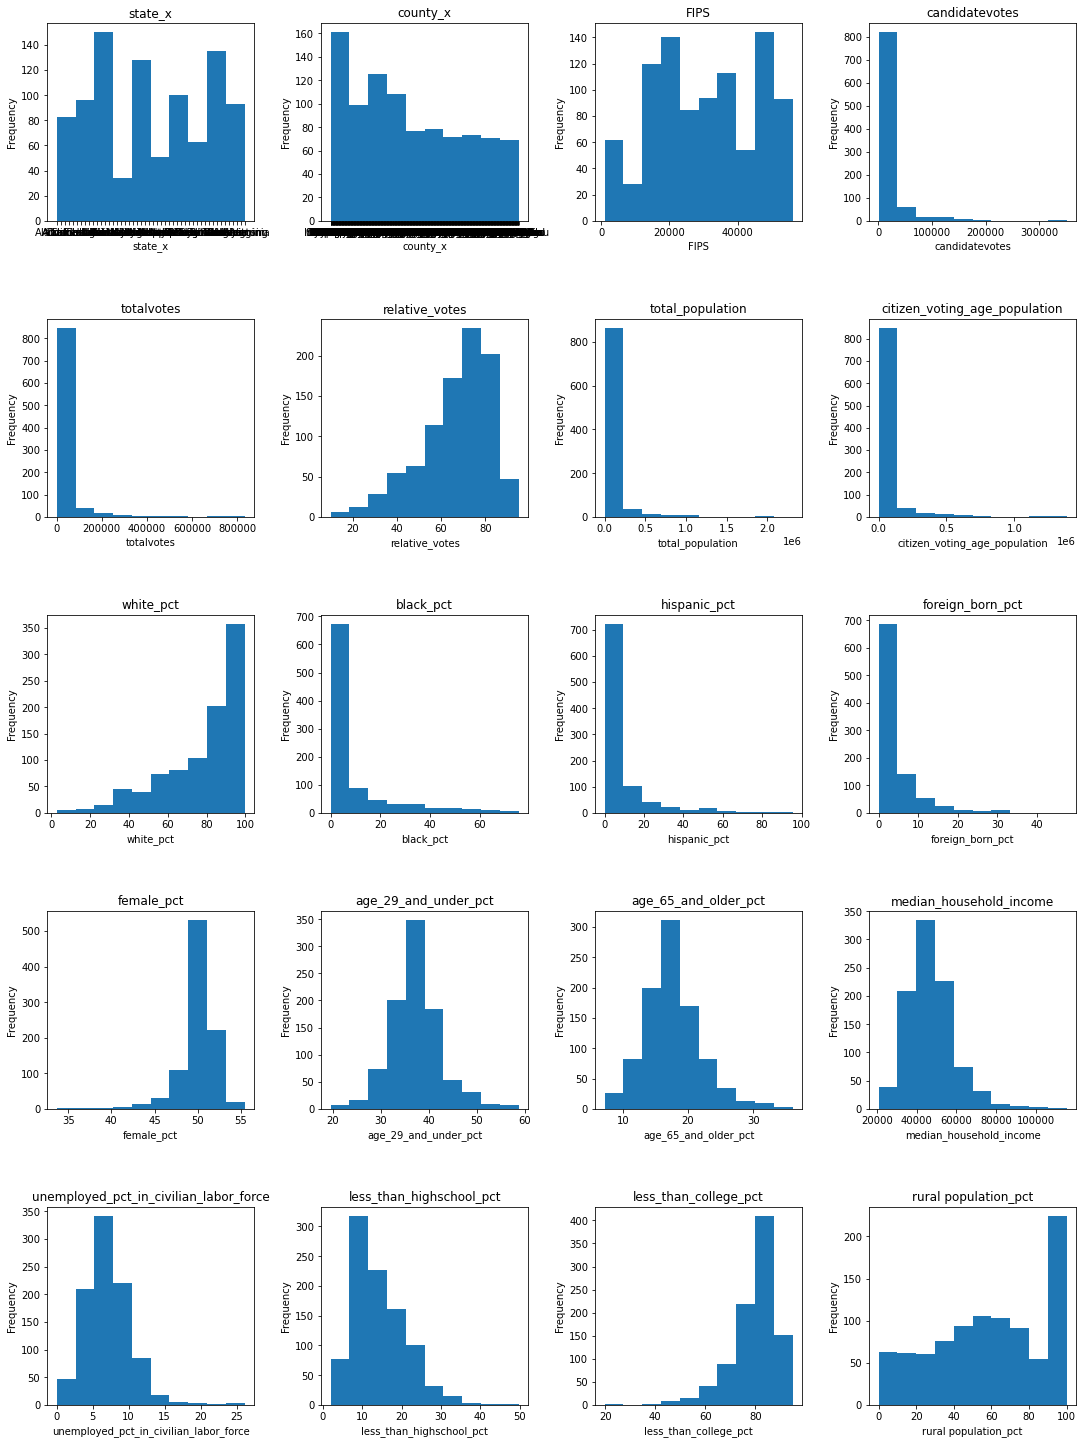

In [203]:
# Lets check out the distributions.

# Setting the plots layout
plt.subplots(5,4, figsize=(15,20))

# Plotting
for i, column in enumerate(df_presidential_data1_clean, start=1):
    plt.subplot(5,4,i)
    plt.hist(df_presidential_data1_clean[column])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()


From the above visuals, we can draw very similar to introduction visuals conclusions.

We see 20 histograms roughly showing the distribution of our data.
   
     - The distribution of FIPS (unique codes for counties) are not equal across states which make sense as states with larger populations have more counties
     - 'candidatevotes' and 'totalvotes' data is very similarly distributed.
     - Among white, black, and Hispanic ethnicities the most voters are of white ethnicity.
     - A small percentage of voters are foreign-born.
     - About 50 percents of voters are women.
     - Interestingly, the data for voters who are younger than 29 years old or older than 65 years old is roughly normally distributed.
     - Same observation (sort of normal data distribution) is valid for median husehold income , unemployed_pct_in_civilian_labor_force
     - less_than_highschool_pct, and less_than_college_pct data is approximately normally distributed with right and left-skewed distribution respectively.
     



   ### There are continuous and categorical variables in our data frame. We will perform a linear regression test for continuous variables and a logistic regression test for categorical variables.

    - Continuos variableas are all columns except 'state_x', 'county_x' and 'FIPS'
    - Categorical variables are 'state_x', 'county_x' and 'FIPS' columns.

In [204]:
df_presidential_data1_clean.dtypes


state_x                                    object
county_x                                   object
FIPS                                        int64
candidatevotes                            float64
totalvotes                                  int64
relative_votes                            float64
total_population                          float64
citizen_voting_age_population             float64
white_pct                                 float64
black_pct                                 float64
hispanic_pct                              float64
foreign_born_pct                          float64
female_pct                                float64
age_29_and_under_pct                      float64
age_65_and_older_pct                      float64
median_household_income                   float64
unemployed_pct_in_civilian_labor_force    float64
less_than_highschool_pct                  float64
less_than_college_pct                     float64
rural population_pct                      float64


### Linear regression

For linear regression we will analyze all columns except 'state_x', 'county_x' and 'FIPS' columns.

In [205]:
df_linear = df_presidential_data1_clean[['candidatevotes', 'totalvotes', 'relative_votes', 'total_population', \
                                         'citizen_voting_age_population', 'white_pct', 'black_pct', 'hispanic_pct',\
                                         'foreign_born_pct', 'female_pct', 'age_29_and_under_pct', 'age_65_and_older_pct',\
                                         'median_household_income', 'unemployed_pct_in_civilian_labor_force',\
                                         'less_than_highschool_pct', 'less_than_college_pct',\
                                         'rural population_pct']]
                                         
                                         

In [206]:
df_linear

,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
17,7843.0,13900,57.554854,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
19,8953.0,10733,85.266667,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
25,7140.0,13031,55.396074,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
27,5245.0,6624,80.916384,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
29,5764.0,6593,89.392060,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,5520.0,6654,89.204913,14223.0,10550.0,88.849047,0.007031,7.691767,2.706883,49.933207,38.515081,13.668003,66737.0,5.282284,9.758393,84.468152,55.360370
6193,11167.0,17023,72.668706,40683.0,30170.0,70.198855,0.516186,6.779244,1.339626,49.907824,39.751247,16.409803,53559.0,7.344324,8.537172,77.648670,51.424370
6209,11115.0,15095,81.428571,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
6215,3409.0,4390,84.110535,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000


We need to  verifying assumptions associated with linear regression models
There are four assumptions associated with a linear regression model:

Linearity: The relationship between the predictor and target variables to be linear.

Independence/No Multicollinearity: The predictor variables are independent of each other.

Residuals are normally distributed.**

Homoscedasticity: The variance of residual is the same for any value of X.**


** Will be tested after modelling.

In [207]:
# Separate the data into X and y variables
# X is the data containing the independent variables.
# y is the target.  The dependent variable.


X = df_linear.drop(columns='relative_votes')
y = df_linear['relative_votes']

#### Independant variables are columns:
-'candidatevotes'
-'totalvotes'
-'total_population'
-'citizen_voting_age_population'
-'white_pct'
-'black_pct'
-'hispanic_pct'
-'foreign_born_pct'
-'female_pct'
-'age_29_and_under_pct'
-'age_65_and_older_pct'
-'median_household_income'
-'unemployed_pct_in_civilian_labor_force'
-'less_than_highschool_pct'
-'less_than_college_pct'
-'rural population_pct'

#### Dependant variable is column:
-'relative_votes'

In [208]:
# Checking the shape of X and y variables

print(f'Original data set had {df_linear.shape[0]} rows and {df_linear.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original data set had 933 rows and 17 columns.
X has 933 rows and 16 columns.
y has 933 rows and 1 column.


##### Checking Linearity.

One of the assumptions when building a linear regression model is that there is a linear relationship between the predictor variables and the target variable. Let's plot the relationship between X and y.

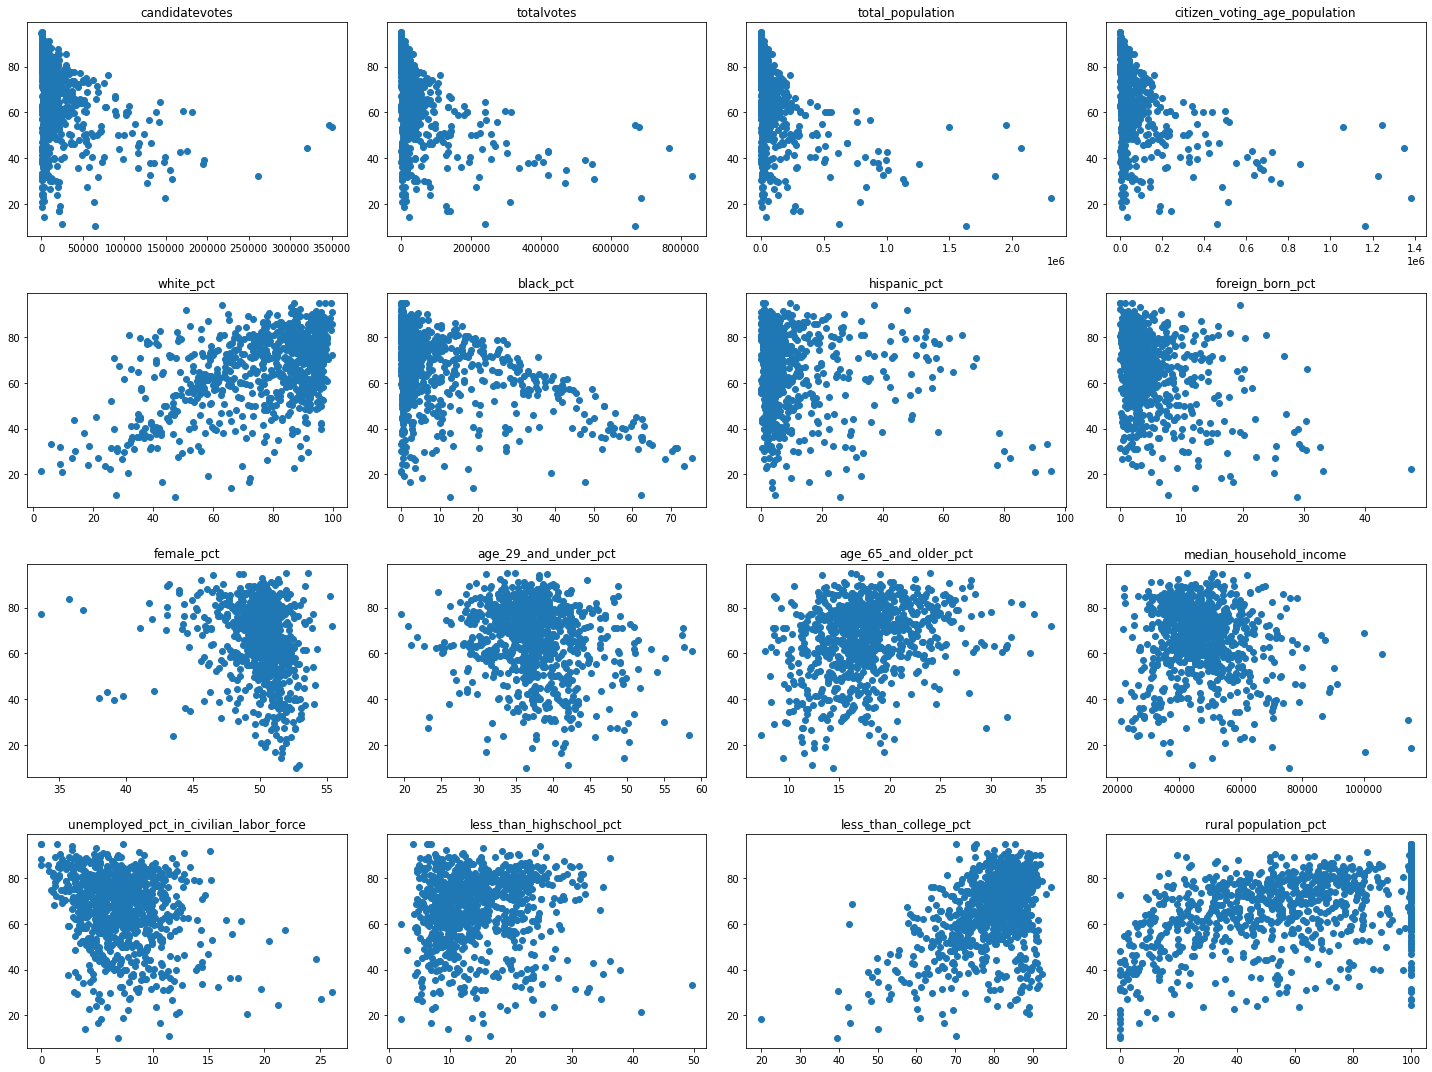

In [209]:
# Loop over the columns and plot the relationship between each column and the target
plt.subplots(4,4, figsize=(20,15))

count = 1

for col in X.columns:
    plt.subplot(4,4,count)
    plt.scatter(X[col],y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

    I do not see any linear relationship between variables and relative votes share right away. Does it mean the other variables violates the assumptions? No, we cannot tell that yet.

    Linearity does not mean that the predictor variables have to be continuous; it merely means the target variable is a linear function of whatever values the predictor variables happen to take on.

##### Checking Independence or No Multicollienearity

Another important assumption when building a linear regression is that there is no collinearity: the predictor variables are independent of each other.

We can use corr() to display a correlation matrix of the dataset:

In [210]:
# Correlation between independent variables
X_corr = X.corr()
X_corr

,candidatevotes,totalvotes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
candidatevotes,1.000000,0.936095,0.907532,0.919617,-0.173002,0.065184,0.122530,0.465764,0.164982,0.159666,-0.283759,0.406653,0.002062,-0.183665,-0.441398,-0.536638
totalvotes,0.936095,1.000000,0.983185,0.989536,-0.237841,0.103159,0.157112,0.563478,0.165943,0.149487,-0.274447,0.392415,0.013988,-0.157754,-0.477423,-0.514475
total_population,0.907532,0.983185,1.000000,0.996531,-0.265520,0.108339,0.185945,0.582962,0.154042,0.170000,-0.283008,0.344496,0.027858,-0.113814,-0.425942,-0.494773
citizen_voting_age_population,0.919617,0.989536,0.996531,1.000000,-0.255620,0.112145,0.170119,0.564972,0.162174,0.164730,-0.281172,0.352328,0.028960,-0.129318,-0.439311,-0.507563
white_pct,-0.173002,-0.237841,-0.265520,-0.255620,1.000000,-0.622416,-0.595445,-0.496407,0.012581,-0.434167,0.371427,0.167044,-0.441003,-0.502906,-0.032551,0.292139
black_pct,0.065184,0.103159,0.108339,0.112145,-0.622416,1.000000,-0.118687,-0.004336,0.075404,0.152445,-0.210386,-0.309366,0.474345,0.362509,0.125704,-0.108268
hispanic_pct,0.122530,0.157112,0.185945,0.170119,-0.595445,-0.118687,1.000000,0.643175,-0.093274,0.307456,-0.194318,0.063710,0.025010,0.351931,-0.017954,-0.249578
foreign_born_pct,0.465764,0.563478,0.582962,0.564972,-0.496407,-0.004336,0.643175,1.000000,-0.023570,0.313627,-0.333765,0.348971,-0.009198,0.169079,-0.377257,-0.477576
female_pct,0.164982,0.165943,0.154042,0.162174,0.012581,0.075404,-0.093274,-0.023570,1.000000,0.044886,0.069626,-0.012117,0.118157,-0.095479,-0.173810,-0.182066
age_29_and_under_pct,0.159666,0.149487,0.170000,0.164730,-0.434167,0.152445,0.307456,0.313627,0.044886,1.000000,-0.829113,0.064957,0.151453,0.174298,-0.118721,-0.447674


    A correlation matrix is a table showing correlation coefficients between sets of variables. Each variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation. Correlation falls on a range of [-1,1],

-1 indicates a perfect negative correlation relationship.
0 indicates no correlation relationship.
and 1 indicates a perfect positive correlation relationship.

Large tables like this are hard to parse through, let's visualize the correlation using a heatmap.

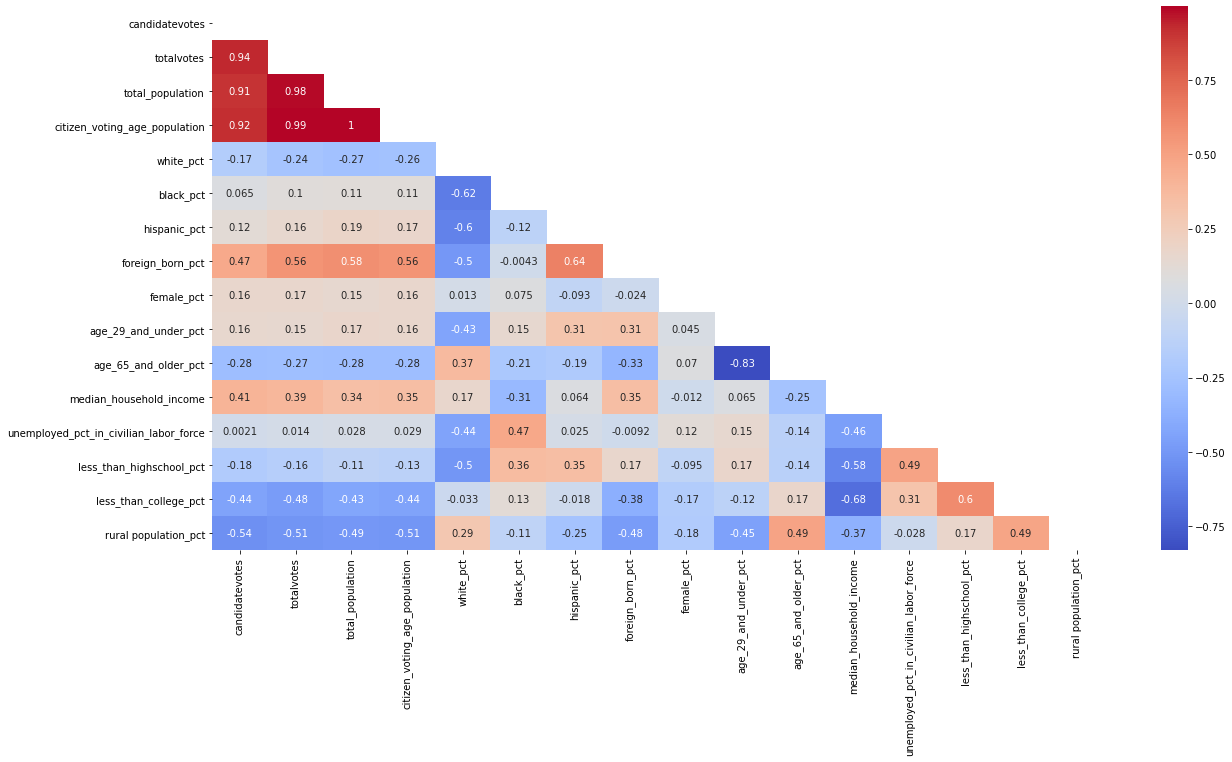

In [211]:
# Correlation of the variables in a heatmap
# Again, we will examine only half of the matrix as the matrix is diagonally symmetrical.


plt.figure(figsize=(20,10))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

    As we can see above, there is a lot of collinearity in this dataset: for example, 'candidatevotes' are highly correlated with 'totalvotes', 'total_population', and 'citizen_voting_age_population', and  'citizen_voting_age_population'is fully positively correlated with 'total_population' column.
    'Totalvotes' column is strongly positivly correlated with 'total_population' and 'citizen_voting_age_population'.
    Columns 'age_65_and_older_pct' and 'age_29_and_under_pct' are strongly negativly correlated.
    We need to make sure to keep this in mind when building our model.

    Let us look at Variance Inflation Factor (VIF) to detect multicollinearity.

    When there is no multicollinearity, the VIF for each predictor should be 1. Usually, any VIF value higher than 5 indicates high collinearity.

In [212]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

candidatevotes                             12.538378
totalvotes                                 87.055861
total_population                          214.948834
citizen_voting_age_population             327.922635
white_pct                                 117.925396
black_pct                                   5.708623
hispanic_pct                                7.014444
foreign_born_pct                            7.028287
female_pct                                529.297359
age_29_and_under_pct                      159.660667
age_65_and_older_pct                       71.867120
median_household_income                    42.964877
unemployed_pct_in_civilian_labor_force     10.759530
less_than_highschool_pct                   21.620244
less_than_college_pct                     197.042158
rural population_pct                       11.118824
dtype: float64

    We can see there are multiple VIFs with very high values:
-totalvotes, total_population, citizen_voting_age_population, female_pct, age_29_and_under_pct, less_than_college_pct.
    Not a single VIF is less than 5. The lowest VIF is ~ 5.7 for 'black_pct' column.
    We can conclude that our model won't be very accurate as there are lots of multicollinearity in this data set.
    

    We are also interested in the correlations between the X variables and the y variable ('relative_votes').
Let's look at those.

In [213]:
# Let's only look at the correlations with 'relative_votes' (our y variable)
linear_corr = df_linear.corr()
linear_corr['relative_votes'].sort_values()

black_pct                                -0.456118
totalvotes                               -0.416798
citizen_voting_age_population            -0.409861
total_population                         -0.402487
foreign_born_pct                         -0.387046
candidatevotes                           -0.316118
unemployed_pct_in_civilian_labor_force   -0.268823
age_29_and_under_pct                     -0.198024
hispanic_pct                             -0.171551
female_pct                               -0.146636
median_household_income                  -0.146382
less_than_highschool_pct                  0.053279
age_65_and_older_pct                      0.258127
rural population_pct                      0.458994
less_than_college_pct                     0.466943
white_pct                                 0.543046
relative_votes                            1.000000
Name: relative_votes, dtype: float64

    As we can see above, the variables that are correlated the most with our target is 'white_pct' . The rest of the columns have correlation of less than .5.

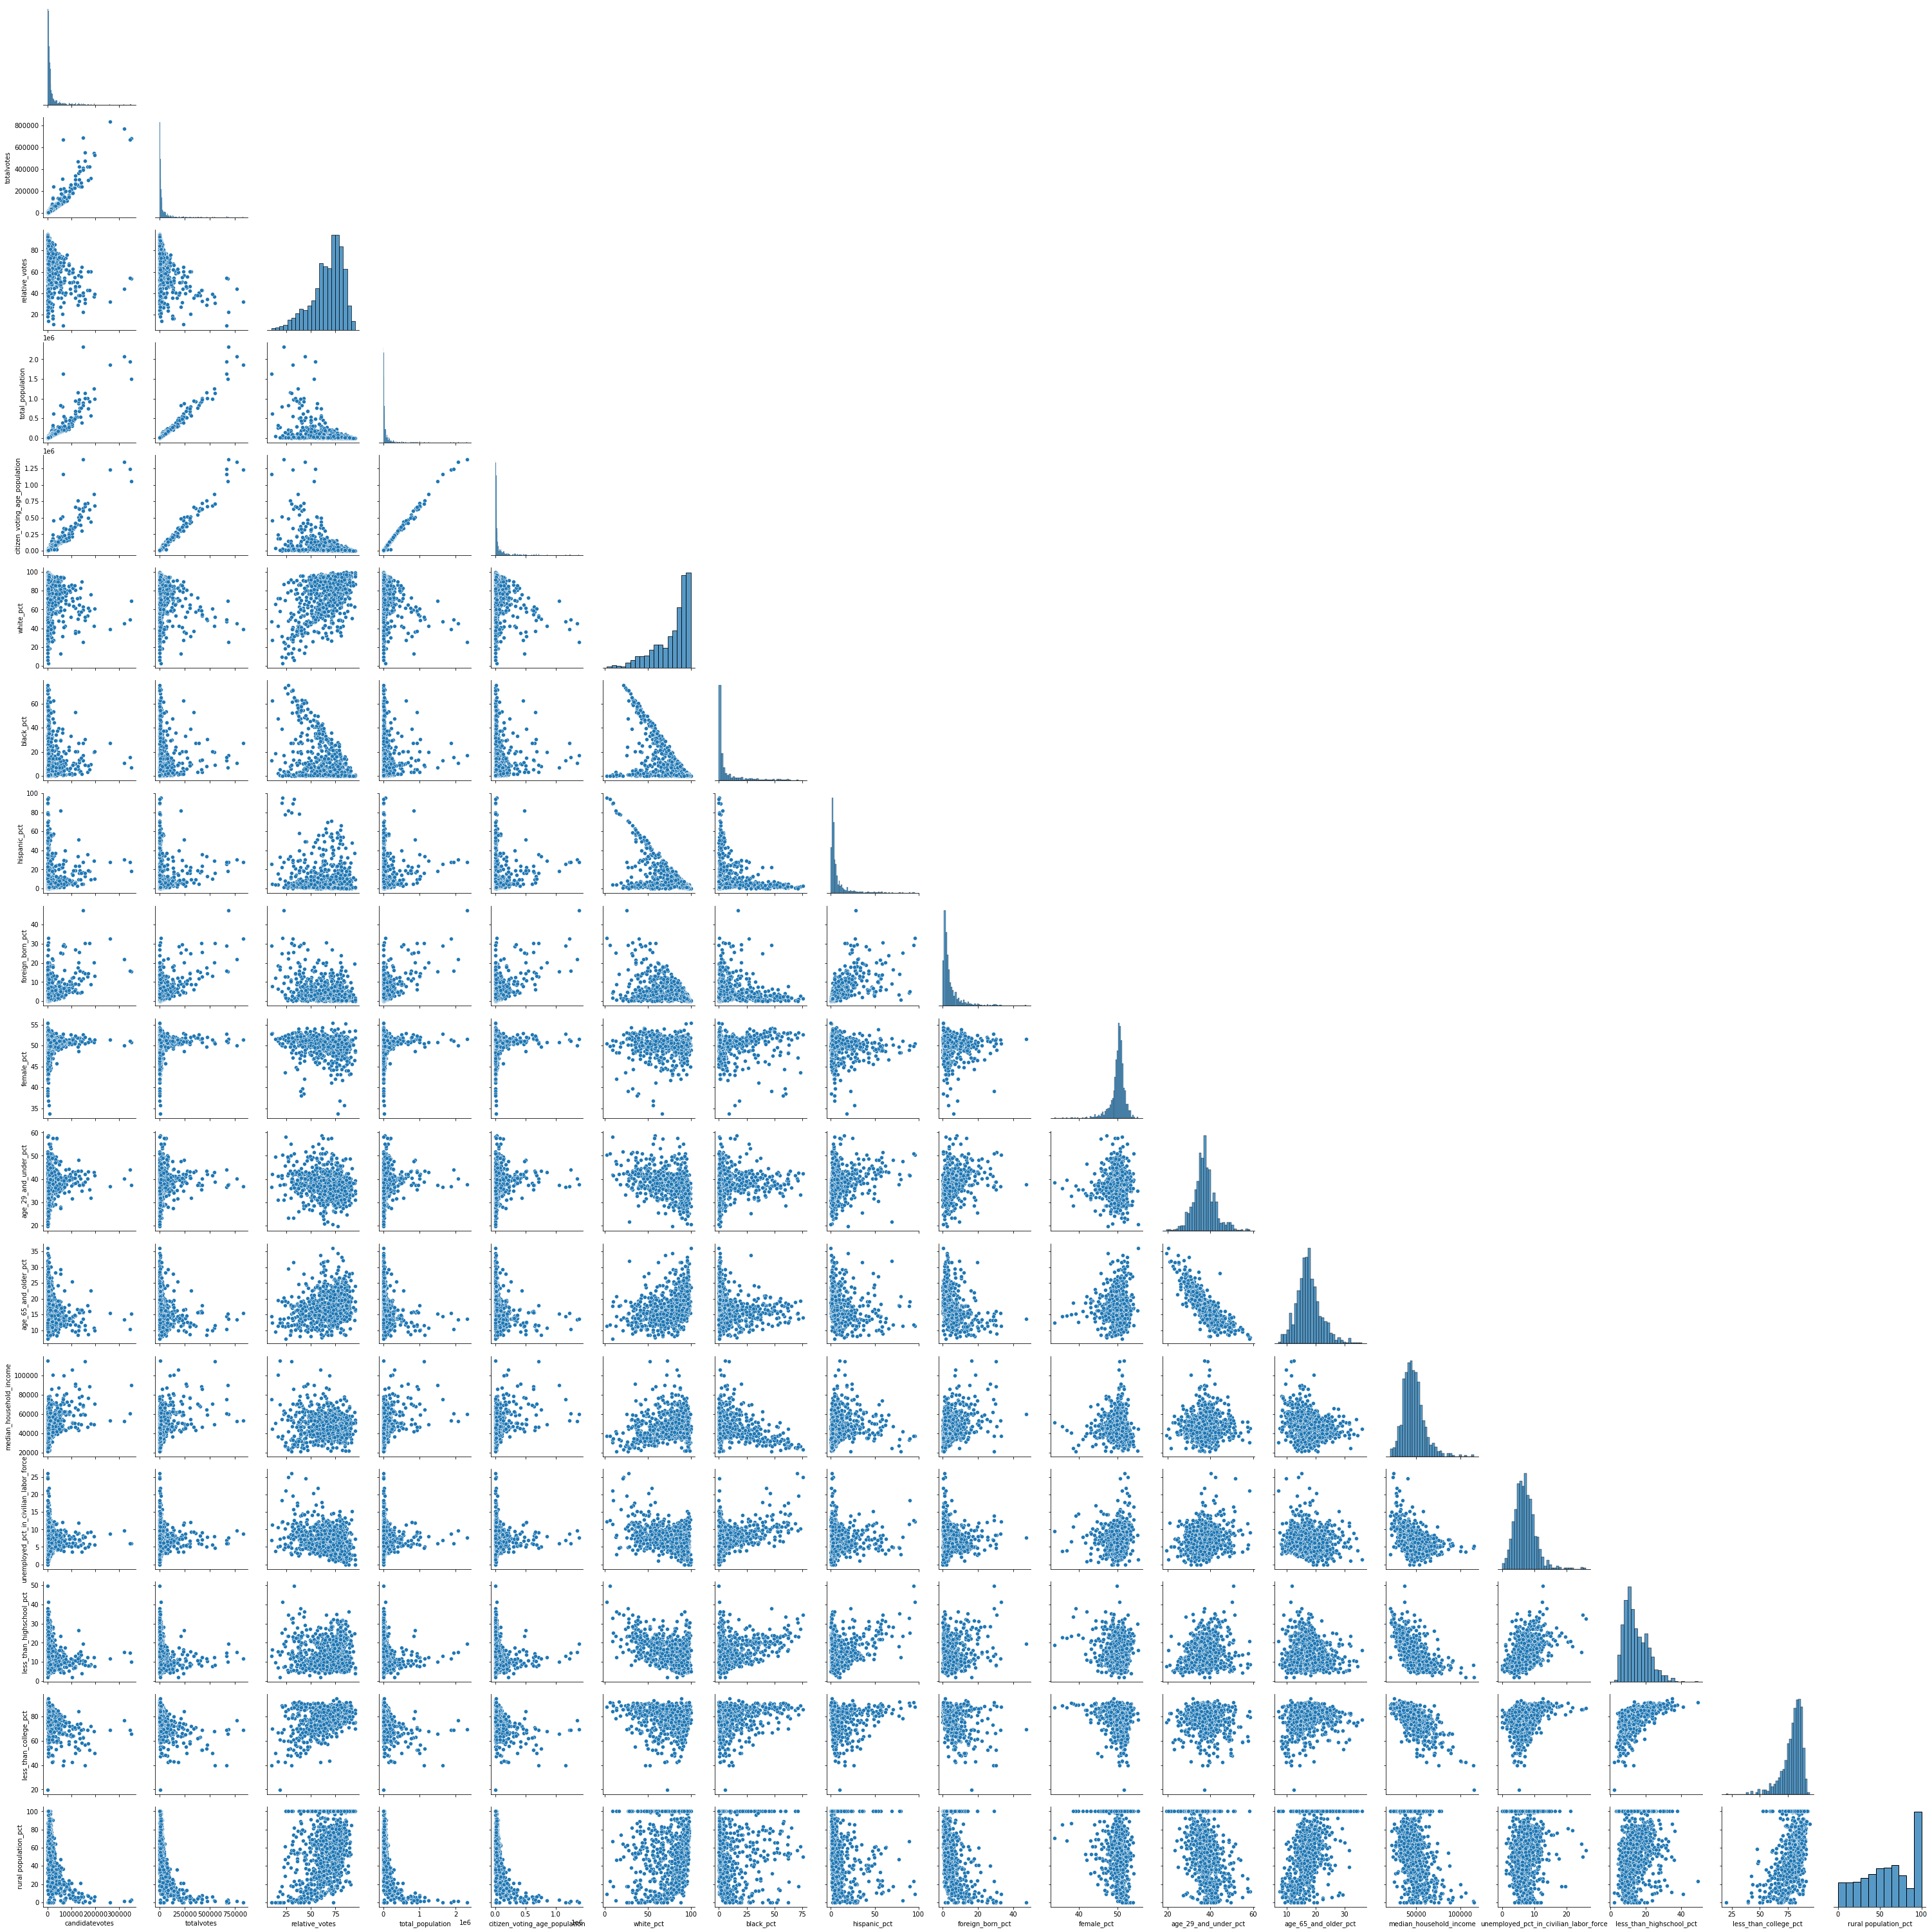

In [214]:
# Use seaborn pairplot to look for collinearity in X variables

sns.pairplot(df_linear, corner=True)
plt.show()

##### Checking if Residuals Are Normally Distributed

    Linear regression assumes normality for the residual errors  𝜖 , which represent variation in  𝑌  which is not explained by the predictor variables. We will address it after modelling, right now we don't have any model, therefore we don't have errors to test.

 ##### Checking Homoscedasticity
    The assumption of equal variances (i.e. assumption of homoscedasticity) assumes that different samples have the same variance, even if they came from different populations. We will address it after modelling as well.

##### Variable selection for model

Let's build some models to predict relative_votes share for republicans in 2016 year.

In [215]:
# import statsmodels linear model for our regression

from statsmodels.regression import linear_model 
import statsmodels.api as sm

In [216]:
# We MUST add our constant

X = sm.add_constant(X)
X.head()

,const,candidatevotes,totalvotes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
17,1.0,7843.0,13900,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
19,1.0,8953.0,10733,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
25,1.0,7140.0,13031,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
27,1.0,5245.0,6624,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
29,1.0,5764.0,6593,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000


     We will use a Top-Bottom approach to build our models.
     
#### Model 1

    Let's first look at our model with all the variables we have.

In [217]:
# fit our first linear model
my_linreg1 = linear_model.OLS(y, X).fit()
my_linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     111.1
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.40e-201
Time:                        17:06:53   Log-Likelihood:                -3399.4
No. Observations:                 933   AIC:                             6833.
Df Residuals:                     916   BIC:                             6915.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -69.6484     13.103     -5.316      0.000     -95.363     -43.933
candidatevotes                             0.0002   2.81e-05      7.063      0.000       0.000       0.000
totalvotes                              -7.11e-05   3.02e-05     -2.351      0.019      -0.000   -1.18e-05
total_population                        3.397e-05   1.97e-05      1.726      0.085   -4.65e-06    7.26e-05
citizen_voting_age_population          -5.244e-05    3.6e-05     -1.458      0.145      -0.000    1.81e-05
white_pct                                  0.3842      0.044      8.716      0.000       0.298       0.471
black_pct                                 -0.1326      0.046     -2.899      0.004      -0.222      -0.043
hispanic_pct                               0.0591      0.051      1.159      0.247      -0.041       0.159
foreign_born_pct                          -0.0998      0.119     -0.836      0.404      -0.334       0.135
female_pct                                -0.1476      0.161     -0.918      0.359      -0.463       0.168
age_29_and_under_pct                       0.7632      0.125      6.121      0.000       0.519       1.008
age_65_and_older_pct                       0.6177      0.162      3.801      0.000       0.299       0.937
median_household_income                    0.0002   4.76e-05      3.876      0.000     9.1e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.8424      0.129     -6.509      0.000      -1.096      -0.588
less_than_highschool_pct                   0.4557      0.090      5.081      0.000       0.280       0.632
less_than_college_pct                      0.7686      0.061     12.587      0.000       0.649       0.888
rural population_pct                       0.0758      0.015      4.971      0.000       0.046       0.106
==============================================================================
Omnibus:                       35.015   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.086
Skew:                          -0.432   Prob(JB):                     1.97e-09
Kurtosis:                       3.533   Cond. No.                     1.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1 | 0.660 |


    The p-value for citizen_voting_age_population is high, and the original correlation matrix showed a correlation coefficient of 1 which shows there is no evidence showing this variable is statistically significant to our model.

    We will drop this column and try building another model.

#### Model 2

In [218]:
# we will drop the 'citizen_voting_age_population' variable and perform another regression

X_new = X.drop(columns=['citizen_voting_age_population'])

my_linreg2 = linear_model.OLS(y, X_new).fit()
my_linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          3.63e-202
Time:                        17:06:54   Log-Likelihood:                -3400.4
No. Observations:                 933   AIC:                             6833.
Df Residuals:                     917   BIC:                             6910.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -70.5073     13.098     -5.383      0.000     -96.212     -44.803
candidatevotes                             0.0002   2.81e-05      7.022      0.000       0.000       0.000
totalvotes                             -9.453e-05   2.56e-05     -3.687      0.000      -0.000   -4.42e-05
total_population                        8.322e-06   8.83e-06      0.943      0.346   -9.01e-06    2.56e-05
white_pct                                  0.3835      0.044      8.696      0.000       0.297       0.470
black_pct                                 -0.1336      0.046     -2.918      0.004      -0.223      -0.044
hispanic_pct                               0.0563      0.051      1.103      0.270      -0.044       0.156
foreign_born_pct                          -0.0624      0.117     -0.534      0.593      -0.291       0.167
female_pct                                -0.1456      0.161     -0.905      0.366      -0.461       0.170
age_29_and_under_pct                       0.7645      0.125      6.128      0.000       0.520       1.009
age_65_and_older_pct                       0.6164      0.163      3.791      0.000       0.297       0.936
median_household_income                    0.0002   4.76e-05      3.953      0.000    9.47e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.8464      0.129     -6.538      0.000      -1.101      -0.592
less_than_highschool_pct                   0.4539      0.090      5.058      0.000       0.278       0.630
less_than_college_pct                      0.7713      0.061     12.628      0.000       0.651       0.891
rural population_pct                       0.0796      0.015      5.295      0.000       0.050       0.109
==============================================================================
Omnibus:                       33.721   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.713
Skew:                          -0.434   Prob(JB):                     6.47e-09
Kurtosis:                       3.466   Cond. No.                     1.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 2 | 0.659 |



There is not much improvement with this model. Lets drop a variable with the highet p-value again. It is 'foreign_born_pct'.

#### Model 3

In [219]:
# we will drop the 'foreign_born_pct' variable and perform another regression
X_new_1 = X.drop(columns=['foreign_born_pct'])

my_linreg3 = linear_model.OLS(y, X_new_1).fit()
my_linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.79e-202
Time:                        17:06:54   Log-Likelihood:                -3399.7
No. Observations:                 933   AIC:                             6831.
Df Residuals:                     917   BIC:                             6909.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -71.1117     12.983     -5.477      0.000     -96.592     -45.632
candidatevotes                             0.0002   2.74e-05      7.442      0.000       0.000       0.000
totalvotes                             -7.453e-05      3e-05     -2.488      0.013      -0.000   -1.57e-05
total_population                        2.947e-05   1.89e-05      1.558      0.120   -7.66e-06    6.66e-05
citizen_voting_age_population          -4.598e-05   3.51e-05     -1.309      0.191      -0.000    2.29e-05
white_pct                                  0.3875      0.044      8.828      0.000       0.301       0.474
black_pct                                 -0.1286      0.045     -2.828      0.005      -0.218      -0.039
hispanic_pct                               0.0482      0.049      0.978      0.328      -0.049       0.145
female_pct                                -0.1325      0.160     -0.829      0.407      -0.446       0.181
age_29_and_under_pct                       0.7598      0.125      6.098      0.000       0.515       1.004
age_65_and_older_pct                       0.6071      0.162      3.748      0.000       0.289       0.925
median_household_income                    0.0002   4.61e-05      3.788      0.000    8.41e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.8392      0.129     -6.488      0.000      -1.093      -0.585
less_than_highschool_pct                   0.4262      0.082      5.171      0.000       0.264       0.588
less_than_college_pct                      0.7826      0.059     13.329      0.000       0.667       0.898
rural population_pct                       0.0788      0.015      5.306      0.000       0.050       0.108
==============================================================================
Omnibus:                       33.930   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.712
Skew:                          -0.424   Prob(JB):                     3.92e-09
Kurtosis:                       3.525   Cond. No.                     1.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 3 | 0.660 |



There is not much improvement with this model. Lets drop a variable with the highet p-value again. It is 'female_pct'.

#### Model 4

In [220]:
# we will drop the 'female_pct' variable and perform another regression
X_new_2 = X.drop(columns=['female_pct'])

my_linreg4 = linear_model.OLS(y, X_new_2).fit()
my_linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.92e-202
Time:                        17:06:54   Log-Likelihood:                -3399.8
No. Observations:                 933   AIC:                             6832.
Df Residuals:                     917   BIC:                             6909.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -75.5079     11.441     -6.600      0.000     -97.962     -53.054
candidatevotes                             0.0002   2.81e-05      7.082      0.000       0.000       0.000
totalvotes                             -7.167e-05   3.02e-05     -2.370      0.018      -0.000   -1.23e-05
total_population                        3.363e-05   1.97e-05      1.710      0.088   -4.97e-06    7.22e-05
citizen_voting_age_population          -5.216e-05    3.6e-05     -1.451      0.147      -0.000    1.84e-05
white_pct                                  0.3801      0.044      8.669      0.000       0.294       0.466
black_pct                                 -0.1359      0.046     -2.980      0.003      -0.225      -0.046
hispanic_pct                               0.0582      0.051      1.141      0.254      -0.042       0.158
foreign_born_pct                          -0.0875      0.119     -0.737      0.461      -0.320       0.145
age_29_and_under_pct                       0.7365      0.121      6.075      0.000       0.499       0.974
age_65_and_older_pct                       0.5768      0.156      3.692      0.000       0.270       0.884
median_household_income                    0.0002   4.76e-05      3.865      0.000    9.05e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.8593      0.128     -6.708      0.000      -1.111      -0.608
less_than_highschool_pct                   0.4499      0.089      5.029      0.000       0.274       0.625
less_than_college_pct                      0.7765      0.060     12.844      0.000       0.658       0.895
rural population_pct                       0.0779      0.015      5.165      0.000       0.048       0.108
==============================================================================
Omnibus:                       35.601   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.985
Skew:                          -0.434   Prob(JB):                     1.26e-09
Kurtosis:                       3.547   Cond. No.                     1.10e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 4 | 0.660 |



There is not much improvement with this model. Lets drop a variable with the highet p-value again. It is 'hispanic_pct'.

#### Model 5

In [221]:
# we will drop the 'hispanic_pct' variable and perform another regression
X_new_3 = X.drop(columns=['hispanic_pct'])

my_linreg5 = linear_model.OLS(y, X_new_3).fit()
my_linreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          2.46e-202
Time:                        17:06:54   Log-Likelihood:                -3400.0
No. Observations:                 933   AIC:                             6832.
Df Residuals:                     917   BIC:                             6909.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -67.1311     12.924     -5.194      0.000     -92.495     -41.767
candidatevotes                             0.0002    2.8e-05      7.172      0.000       0.000       0.000
totalvotes                             -7.299e-05   3.02e-05     -2.417      0.016      -0.000   -1.37e-05
total_population                        3.294e-05   1.97e-05      1.676      0.094   -5.64e-06    7.15e-05
citizen_voting_age_population          -5.085e-05   3.59e-05     -1.415      0.157      -0.000    1.97e-05
white_pct                                  0.3469      0.030     11.507      0.000       0.288       0.406
black_pct                                 -0.1685      0.034     -5.009      0.000      -0.235      -0.102
foreign_born_pct                          -0.0644      0.116     -0.557      0.577      -0.291       0.162
female_pct                                -0.1438      0.161     -0.894      0.371      -0.459       0.172
age_29_and_under_pct                       0.7617      0.125      6.108      0.000       0.517       1.006
age_65_and_older_pct                       0.6357      0.162      3.929      0.000       0.318       0.953
median_household_income                    0.0002   4.75e-05      3.936      0.000    9.38e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.8767      0.126     -6.957      0.000      -1.124      -0.629
less_than_highschool_pct                   0.4738      0.088      5.363      0.000       0.300       0.647
less_than_college_pct                      0.7763      0.061     12.788      0.000       0.657       0.895
rural population_pct                       0.0736      0.015      4.862      0.000       0.044       0.103
==============================================================================
Omnibus:                       30.542   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.105
Skew:                          -0.405   Prob(JB):                     3.93e-08
Kurtosis:                       3.470   Cond. No.                     1.24e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 6

In [222]:
# we will drop the 'foreign_born_pct' variable and perform another regression
X_new_4 = X.drop(columns=['foreign_born_pct', 'total_population', 'citizen_voting_age_population', 'hispanic_pct',\
                         'female_pct', 'totalvotes', 'candidatevotes'])

my_linreg6 = linear_model.OLS(y, X_new_4).fit()
my_linreg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     180.6
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.12e-196
Time:                        17:06:56   Log-Likelihood:                -3428.8
No. Observations:                 933   AIC:                             6878.
Df Residuals:                     923   BIC:                             6926.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -87.0082     10.996     -7.912      0.000    -108.589     -65.427
white_pct                                  0.3771      0.027     14.097      0.000       0.325       0.430
black_pct                                 -0.1632      0.031     -5.239      0.000      -0.224      -0.102
age_29_and_under_pct                       0.8093      0.122      6.618      0.000       0.569       1.049
age_65_and_older_pct                       0.6376      0.158      4.036      0.000       0.328       0.948
median_household_income                    0.0002   4.57e-05      4.779      0.000       0.000       0.000
unemployed_pct_in_civilian_labor_force    -0.8601      0.126     -6.815      0.000      -1.108      -0.612
less_than_highschool_pct                   0.4365      0.080      5.450      0.000       0.279       0.594
less_than_college_pct                      0.8825      0.057     15.588      0.000       0.771       0.994
rural population_pct                       0.0622      0.014      4.503      0.000       0.035       0.089
==============================================================================
Omnibus:                       24.145   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.470
Skew:                          -0.380   Prob(JB):                     2.95e-06
Kurtosis:                       3.277   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next we need to perform a Model Diagnostics.

But before We need to check two of the four assumptions associated with a linear regression model: 
-Residuals are normally distributed.** 
-Homoscedasticity: The variance of residual is the same for any value of X.**

#### Model 1

Checking  Residuals
A residual plot can help to visualize whether the error in the model is random or non-random
The distribution of the residual values should appear to be normally distributed

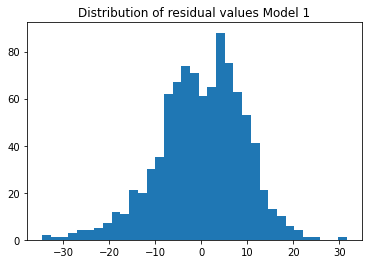

In [223]:
# Plotting the residuals of the model 1
plt.figure()
plt.hist(my_linreg1.resid, bins = 35)
plt.title('Distribution of residual values Model 1')
plt.show()

The distribution of residual values is close to a normal distribution, but it has 2 peaks. Let's take a look at the Shaprio-Wilk test.

In [224]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg1.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.9879800081253052, pvalue=6.294942522799829e-07)


The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed. Because the p-value is less than 0.05, we can reject the null hypothesis and state that the data is NOT normally distributed.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

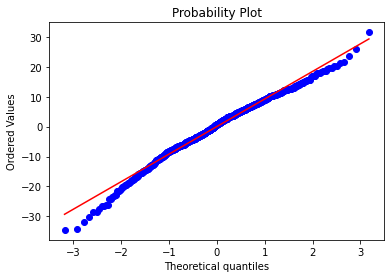

In [225]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg1.resid, dist="norm", plot = plt);
plt.show()

We can see that the data is not aligned with the normal distribution line (particularly on the ends).

Checking homoscedasticity

The variance of residual is the same .

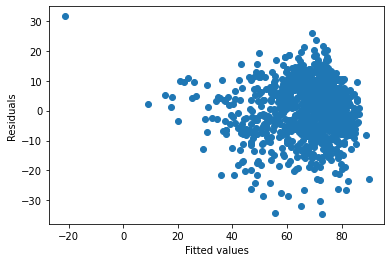

In [226]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg1.fittedvalues, my_linreg1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

the residuals do look very clustered together  which might suggest that there are some outliers that affected our model. More investigation would be needed in terms of that.


Result: we cannot use model 1.

#### Model 2

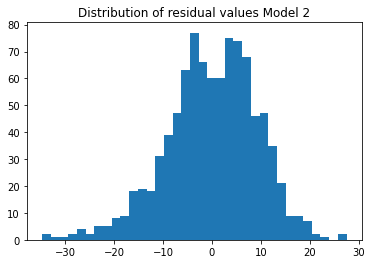

In [227]:
# Plotting the residuals of the model 1
plt.figure()
plt.hist(my_linreg2.resid, bins = 35)
plt.title('Distribution of residual values Model 2')
plt.show()

The distribution of residual values is close to a normal distribution. But let's take a look at the Shaprio-Wilk test.

In [228]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg2.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.9884493947029114, pvalue=1.0284612699251738e-06)


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed can be rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

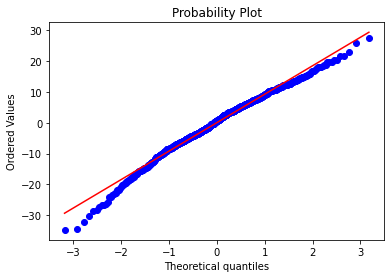

In [229]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg2.resid, dist="norm", plot = plt);
plt.show()

Again, resuduals are not aligned with the normal distribution.

Checking homoscedasticity


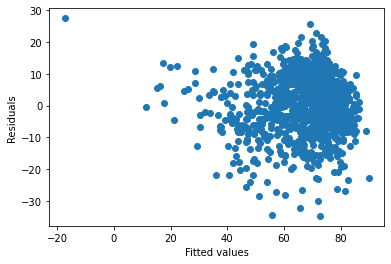

In [230]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg2.fittedvalues, my_linreg2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The residuals look very clustered together. Data is not homoscedastic.


Result: we cannot use model 2.

#### Model 3

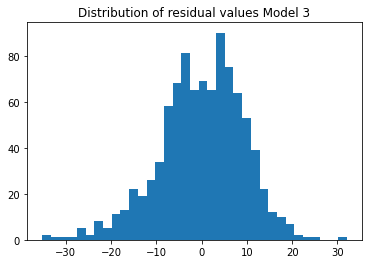

In [231]:
# Plotting the residuals of the model 1
plt.figure()
plt.hist(my_linreg3.resid, bins = 35)
plt.title('Distribution of residual values Model 3')
plt.show()

The distribution of residual values is close to a normal distribution. But let's take a look at the Shaprio-Wilk test.

In [232]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg3.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.9884598255157471, pvalue=1.0398218819318572e-06)


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed can be rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

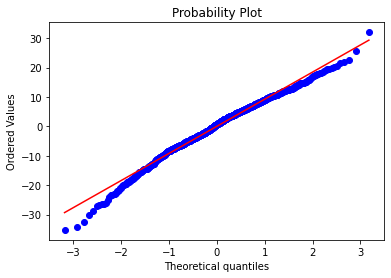

In [233]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg3.resid, dist="norm", plot = plt);
plt.show()

Again, resuduals are not aligned with the normal distribution.

Checking homoscedasticity



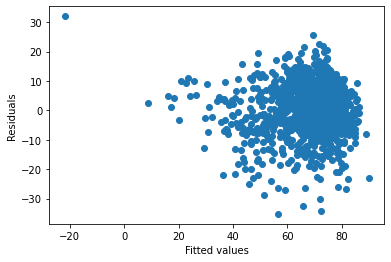

In [234]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg3.fittedvalues, my_linreg3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The residuals look very clustered together. Data is not homoscedastic.



Result: we cannot use model 3.

#### Model 4

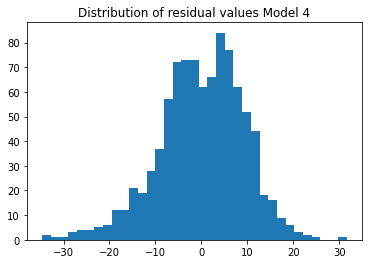

In [235]:
# Plotting the residuals of the model 1
plt.figure()
plt.hist(my_linreg4.resid, bins = 35)
plt.title('Distribution of residual values Model 4')
plt.show()

The distribution of residual values is close to a normal distribution. But let's take a look at the Shaprio-Wilk test.

In [236]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg4.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.9879210591316223, pvalue=5.922969421590096e-07)


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed can be rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

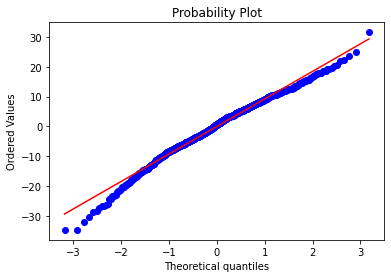

In [237]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg4.resid, dist="norm", plot = plt);
plt.show()

Again, resuduals are not aligned with the normal distribution.

Checking homoscedasticity

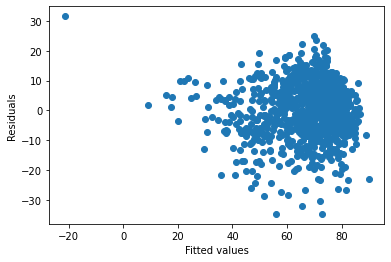

In [238]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg4.fittedvalues, my_linreg4.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The residuals look very clustered together. Data is not homoscedastic.


Result: we cannot use model 4.

#### Model 5

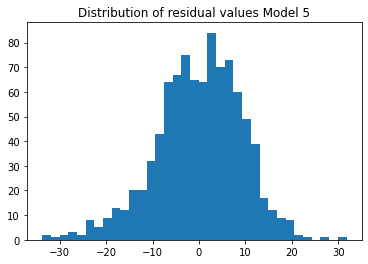

In [239]:
# Plotting the residuals of the model 1
plt.figure()
plt.hist(my_linreg5.resid, bins = 35)
plt.title('Distribution of residual values Model 5')
plt.show()

The distribution of residual values is close to a normal distribution. But let's take a look at the Shaprio-Wilk test.

In [240]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg5.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.9891596436500549, pvalue=2.205172222602414e-06)


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed can be rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

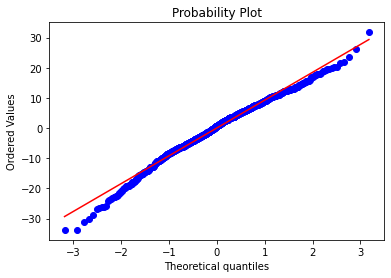

In [241]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg5.resid, dist="norm", plot = plt);
plt.show()

Again, resuduals are not aligned with the normal distribution.

Checking homoscedasticity

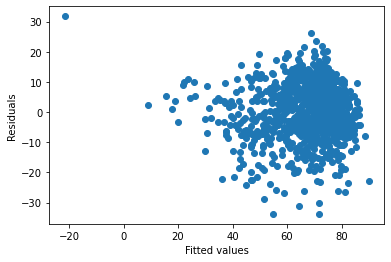

In [242]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg5.fittedvalues, my_linreg5.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The residuals look very clustered together. Data is not homoscedastic.

Result: we might use model 5.

#### Model 6

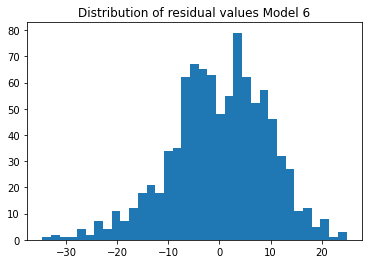

In [243]:
# Plotting the residuals of the model 1
plt.figure()
plt.hist(my_linreg6.resid, bins = 35)
plt.title('Distribution of residual values Model 6')
plt.show()

The distribution of residual values is close to a normal distribution. But let's take a look at the Shaprio-Wilk test.

In [244]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg6.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.9906430840492249, pvalue=1.1807253940787632e-05)


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed can be rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

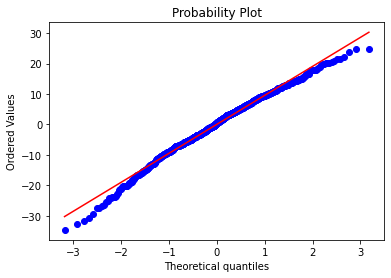

In [245]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg6.resid, dist="norm", plot = plt);
plt.show()

Again, resuduals are not aligned with the normal distribution. But this is the best alignment out of all models.

Checking homoscedasticity​.

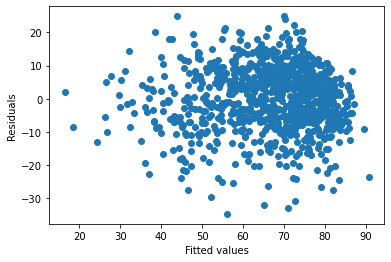

In [246]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg6.fittedvalues, my_linreg6.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

    The residuals do look somewhat clustered together though which might suggest that some outliers affected our model. However, this is the best result out of all models.

Result: we might use model 6.

    Analyzing the above models, I think we should pick Model 6. Even though this model can predict the relative vote share by only 63.8% (R-squared is 0.638) compare to other models which predict by 66 %, this model holds linear regression test assumptions the best (less homoscedastic model).

    As we decide to go with the Model 6 regression test model, we can state that the most positively predictive independent variable is  'less_than_college_pct' variable, and the most negatively predictive variable is 'unemployed_pct_in_civilian_labor_force' variable.
    The fit of Model 6 can predict the relative vote share for democrats in 2016 with  63.8%. 
    The metric that is a good measure to evaluate our model is the R Square/Adjusted R Square metric.

#### Logistic regression.

Assumptions of Logistic Regression:

-binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

-logistic regression requires the observations to be independent of each other.  

- logistic regression requires there to be little or no multicollinearity among the independent variables.  

- logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

-  logistic regression typically requires a large sample size. 

(https://www.statisticssolutions.com/assumptions-of-logistic-regression/)

    We know already that there is a lot of  multicollinearity among the independent variables. We can expect that our model won't work well.

In [247]:
# checking data types to see what data types are our variables for logistic regression test:
# 'state_x', 'county_x', and 'FIPS' columns

df_presidential_data1_clean.dtypes

state_x                                    object
county_x                                   object
FIPS                                        int64
candidatevotes                            float64
totalvotes                                  int64
relative_votes                            float64
total_population                          float64
citizen_voting_age_population             float64
white_pct                                 float64
black_pct                                 float64
hispanic_pct                              float64
foreign_born_pct                          float64
female_pct                                float64
age_29_and_under_pct                      float64
age_65_and_older_pct                      float64
median_household_income                   float64
unemployed_pct_in_civilian_labor_force    float64
less_than_highschool_pct                  float64
less_than_college_pct                     float64
rural population_pct                      float64


     We can see that the 'state_x' and 'county_x' columns are object types, and the 'FIPS' column is an integer data type.

In [114]:
# For the logistic test we will keep only 'state_x', 'county_x', 'FIPS', and 'relative_votes' columns, as these columns 
# have categorical data.

df_logistic = df_presidential_data1_clean[['state_x', 'county_x', 'FIPS', 'relative_votes']]
                                         

In [115]:
df_logistic

,state_x,county_x,FIPS,relative_votes
17,Alabama,Chambers,1017,57.554854
19,Alabama,Cherokee,1019,85.266667
25,Alabama,Clarke,1025,55.396074
27,Alabama,Clay,1027,80.916384
29,Alabama,Cleburne,1029,89.392060
...,...,...,...,...
6189,Wyoming,Converse,56009,89.204913
6193,Wyoming,Fremont,56013,72.668706
6209,Wyoming,Park,56029,81.428571
6215,Wyoming,Sublette,56035,84.110535


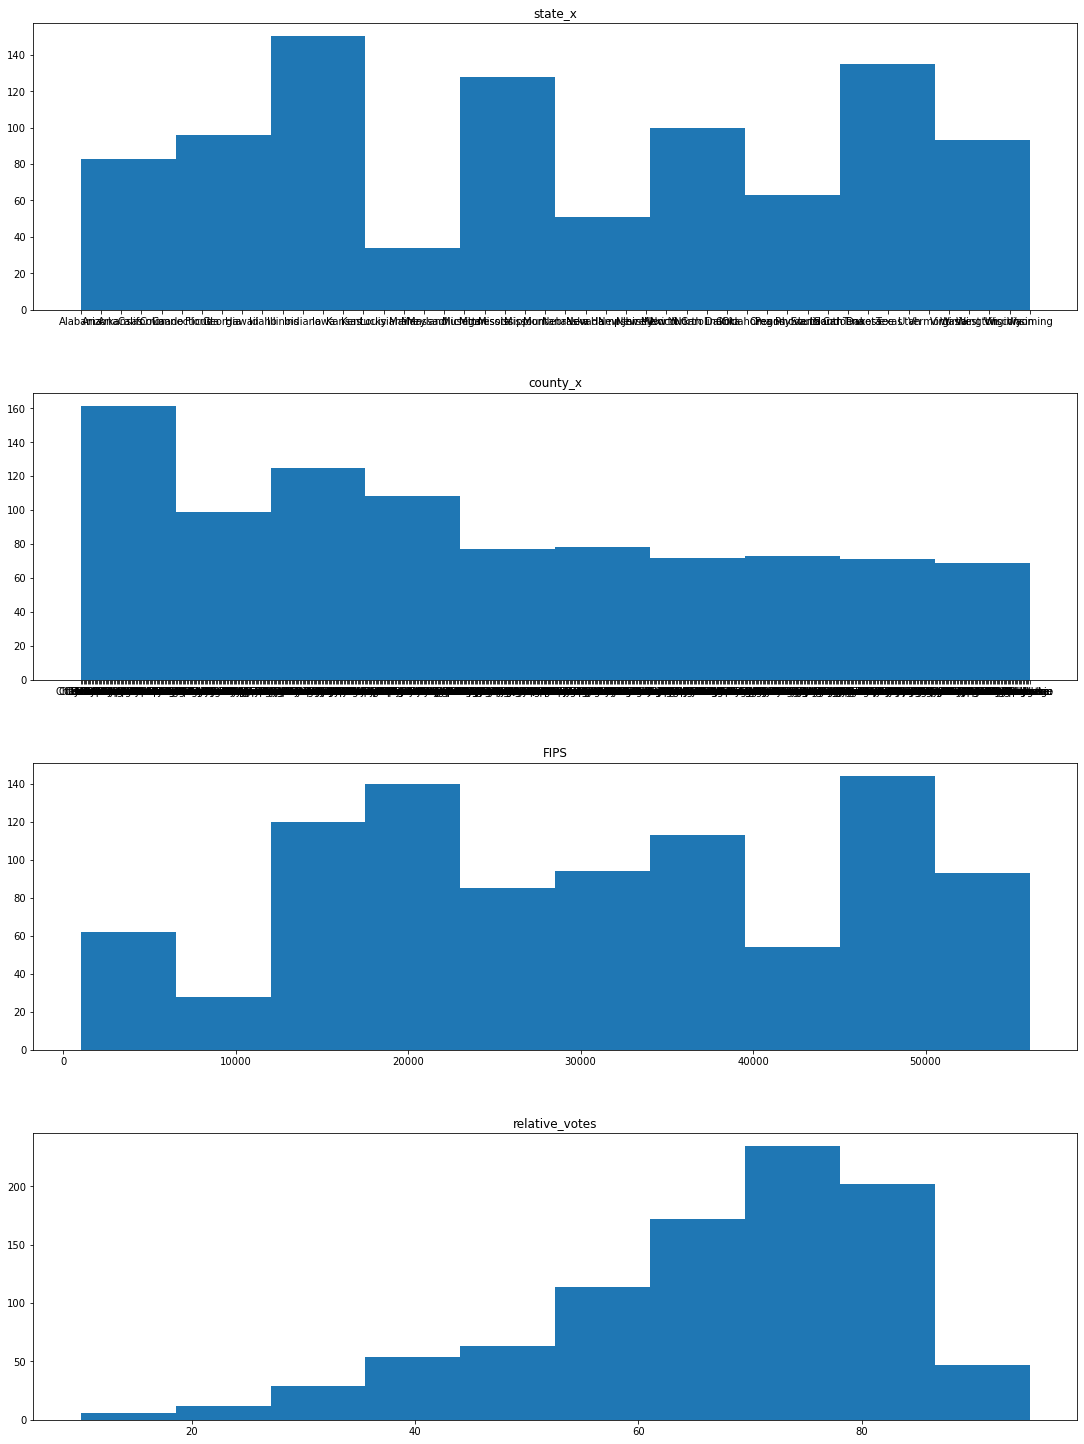

In [116]:
# Lets check out the distributions.

# Setting the plots layout
plt.subplots(4,1, figsize=(15,20))

# Plotting
for i, column in enumerate(df_logistic.columns, 1):
    plt.subplot(4,1,i)
    plt.hist(df_logistic[column])
    plt.title(column)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)


   From the above graphs, we can see that columns 'state_x', 'county_x', and 'FIPS'do indeed have categorical data types and distributed differntly between states and counties (some states have more counties as expected as there is more population there). The 'Relative_votes' column seems to be approximately normally distributed data with the left-skewed distribution.

In [117]:
# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = df_logistic.corr()

# Display corr_mat
corr_mat

,FIPS,relative_votes
FIPS,1.000000,0.006955
relative_votes,0.006955,1.000000


    We notice that the correlation matrix has only 2 columns and 2 rows even though the data frame df_logistic  has columns 'state_x', 'county_x', 'FIPS', and 'relative_votes'. I think this happened as the FIPS which is a uniques number for each county is fully described on its own, and 'state_x' and "county"x' are redundant columns.

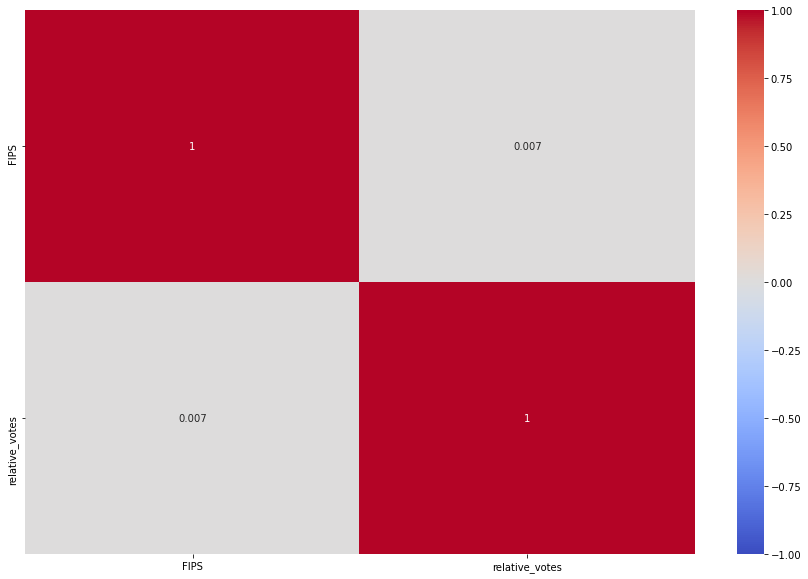

In [130]:
# Creating a heatmap
# Heatmap 2.0


plt.figure(figsize=(15,10))

sns.heatmap(corr_mat, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

Based on the correlation matrix, it looks like FISP is almost not correlated at all with relative votes share.



 Building a logistic regression model.

In [119]:
# Importing.

import statsmodels.api as sm

Our independent variables are: columns 'state_x', 'county_x', and 'FIPS'.
                              
Our dependent variable is column 'relative_votes'. 

In [120]:
# checking our data frame again

df_logistic

,state_x,county_x,FIPS,relative_votes
17,Alabama,Chambers,1017,57.554854
19,Alabama,Cherokee,1019,85.266667
25,Alabama,Clarke,1025,55.396074
27,Alabama,Clay,1027,80.916384
29,Alabama,Cleburne,1029,89.392060
...,...,...,...,...
6189,Wyoming,Converse,56009,89.204913
6193,Wyoming,Fremont,56013,72.668706
6209,Wyoming,Park,56029,81.428571
6215,Wyoming,Sublette,56035,84.110535


In [121]:
# I will assign number '1' to the 'relative_votes' column entries where relative_votes are more or equal to 50 %. 
# This should improve our logistic regression model.

df_logistic["relative_votes"] = np.where(df_logistic["relative_votes"] >= 50, "1", "0")

<ipython-input-121-de911e395dbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic["relative_votes"] = np.where(df_logistic["relative_votes"] >= 50, "1", "0")


In [122]:
df_logistic

,state_x,county_x,FIPS,relative_votes
17,Alabama,Chambers,1017,1
19,Alabama,Cherokee,1019,1
25,Alabama,Clarke,1025,1
27,Alabama,Clay,1027,1
29,Alabama,Cleburne,1029,1
...,...,...,...,...
6189,Wyoming,Converse,56009,1
6193,Wyoming,Fremont,56013,1
6209,Wyoming,Park,56029,1
6215,Wyoming,Sublette,56035,1


In [123]:
# We should get dummies variables for the columns 'state_x', 'county_x', and 'FIPS' for the model to work.

dfdummies = pd.get_dummies(data=df_logistic,columns=['state_x', 'county_x', 'FIPS'])

In [124]:
# checking if dummies variables have been asigned.

dfdummies

,relative_votes,state_x_Alabama,state_x_Arizona,state_x_Arkansas,state_x_California,state_x_Colorado,state_x_Connecticut,state_x_Florida,state_x_Georgia,state_x_Hawaii,...,FIPS_55121,FIPS_55123,FIPS_55129,FIPS_55133,FIPS_55139,FIPS_56009,FIPS_56013,FIPS_56029,FIPS_56035,FIPS_56043
17,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6193,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6215,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [125]:

# Saving the independent variables to 'X'

X_logistic = dfdummies

# Saving dependent variable to 'y'

y_logistic = df_logistic['relative_votes']

# Check 

display(X_logistic)

print(y_logistic)

,relative_votes,state_x_Alabama,state_x_Arizona,state_x_Arkansas,state_x_California,state_x_Colorado,state_x_Connecticut,state_x_Florida,state_x_Georgia,state_x_Hawaii,...,FIPS_55121,FIPS_55123,FIPS_55129,FIPS_55133,FIPS_55139,FIPS_56009,FIPS_56013,FIPS_56029,FIPS_56035,FIPS_56043
17,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6193,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6215,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


17      1
19      1
25      1
27      1
29      1
       ..
6189    1
6193    1
6209    1
6215    1
6223    1
Name: relative_votes, Length: 933, dtype: object


In [126]:
# !! Add constant to our X_logistic !!

X_const_logistic = sm.add_constant(X_logistic)

# Check it out 

X_const_logistic

,const,relative_votes,state_x_Alabama,state_x_Arizona,state_x_Arkansas,state_x_California,state_x_Colorado,state_x_Connecticut,state_x_Florida,state_x_Georgia,...,FIPS_55121,FIPS_55123,FIPS_55129,FIPS_55133,FIPS_55139,FIPS_56009,FIPS_56013,FIPS_56029,FIPS_56035,FIPS_56043
17,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6193,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6209,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6215,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
# Build the model.

# Instantiate the logistic regression model 

logreg = sm.Logit(y_logistic.astype(int), X_const_logistic.astype(int))

# Fit the model (this returns a separate object with the parameters)

logreg_results = logreg.fit(method='bfgs')

# Display the results 

logreg_results.summary()


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


C:\Users\npars\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         relative_votes   No. Observations:                  933
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                          806
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                   1.000
Time:                        15:47:39   Log-Likelihood:             -0.0089613
converged:                       True   LL-Null:                       -394.47
Covariance Type:            nonrobust   LLR p-value:                    0.6597
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -8.5063        nan        nan        nan         nan         nan
relative_votes                   41.2260        nan        nan        nan         nan         nan
state_x_Alabama                   0.2227        nan        nan        nan         nan         nan
state_x_Arizona                  -0.6006        nan        nan        nan         nan         nan
state_x_Arkansas                 -0.3787        nan        nan        nan         nan         nan
state_x_California               -2.0713        nan        nan        nan         nan         nan
state_x_Colorado                 -0.9263        nan        nan        nan         nan         nan
state_x_Connecticut              -0.7058        nan        nan        nan         nan         nan
state_x_Florida                   0.3276        nan        nan        nan         nan         nan
state_x_Georgia                  -1.4933        nan        nan        nan         nan         nan
state_x_Hawaii                   -0.3541        nan        nan        nan         nan         nan
state_x_Idaho                     0.2723        nan        nan        nan         nan         nan
state_x_Illinois                 -0.0317        nan        nan        nan         nan         nan
state_x_Indiana                   0.7728        nan        nan        nan         nan         nan
state_x_Iowa                      0.6722        nan        nan        nan         nan         nan
state_x_Kansas                    1.1910        nan        nan        nan         nan         nan
state_x_Kentucky                  1.8376        nan        nan        nan         nan         nan
state_x_Louisiana                -0.4353        nan        nan        nan         nan         nan
state_x_Maine                    -0.8474        nan        nan        nan         nan         nan
state_x_Maryland                 -0.3913        nan        nan        nan         nan         nan
state_x_Massachusetts            -1.4031        nan        nan        nan         nan         nan
state_x_Michigan                  0.8331        nan        nan        nan         nan         nan
state_x_Minnesota                 0.6767        nan        nan        nan         nan         nan
state_x_Mississippi              -1.8192        nan        nan        nan         nan         nan
state_x_Missouri                  1.1168        nan        nan        nan         nan         nan
state_x_Montana                   0.5289        nan        nan        nan         nan         nan
state_x_Nebraska                  1.4424        nan        nan        nan         nan         nan
state_x_Nevada                   -0.1431        nan        nan        nan         nan         nan
state_x_New Hampshire             0.1060        nan        nan        nan         nan         nan
state_x_New Jersey               -1.2989        nan        nan        nan         nan         nan
state_x

    We got our model with coefficients, however, no p=values are being counted. Lots of other information is missing as well.
    We cannot say  with independent variable is significant in the model becouse we do not have p-values.
    
    I suspect this happened because there was a single correlation matrix in the model, and it was simply not enough variables to build a good model.

    Normally, the next step would be to evaluate how well our model performed by looking at the accuracy of its predictions. 

We would need to get the model's predictions of the 'relative_votes' and then compare that to the known 'relative_votes' stored
in the `y` variable. 

We would need to calculate y_proba like shown below.

y_proba = logreg_results.predict(X_const_logistic)



 Next we would go  from soft predictions (probabilities) to hard predictions (1 or 0)
We would  set our threshold to 0.5 

y_pred = np.where(y_proba >= 0.5, 1, 0)

 

Then, knowing  our model predictions, we would determine the accuracy of the model's performance in %.


acc = (y_pred == y).sum()/df.shape[0]

print(f'Model accuracy = {acc}')

   Unfortunately, we cannot perform all these steps as we do not have enough information in our logistic regression model.

    We can though  interpret the  coefficients.
    
Let's interpret some of the coefficients and determine how the different factors impact the odds of Republican relative_votes shares.

In [131]:
# Getting the regression coefficients from the params attribute of the fitted model object

logreg_results.params

const               -8.506269
relative_votes      41.225988
state_x_Alabama      0.222678
state_x_Arizona     -0.600551
state_x_Arkansas    -0.378719
                      ...    
FIPS_56009           0.052862
FIPS_56013           0.052744
FIPS_56029           0.052803
FIPS_56035           0.052862
FIPS_56043           0.052862
Length: 1673, dtype: float64

In [132]:
# Lets put this in a dataframe

results_df = pd.DataFrame(logreg_results.params, columns=['Coefficient'])

# Display the dataframe

results_df

,Coefficient
const,-8.506269
relative_votes,41.225988
state_x_Alabama,0.222678
state_x_Arizona,-0.600551
state_x_Arkansas,-0.378719
...,...
FIPS_56009,0.052862
FIPS_56013,0.052744
FIPS_56029,0.052803
FIPS_56035,0.052862


In [133]:
# Calculate and add the odds ratios to results_df

results_df['odds_ratio'] = np.exp(results_df['Coefficient'])

# Display the dataframe

results_df

,Coefficient,odds_ratio
const,-8.506269,2.021969e-04
relative_votes,41.225988,8.020829e+17
state_x_Alabama,0.222678,1.249419e+00
state_x_Arizona,-0.600551,5.485092e-01
state_x_Arkansas,-0.378719,6.847380e-01
...,...,...
FIPS_56009,0.052862,1.054284e+00
FIPS_56013,0.052744,1.054160e+00
FIPS_56029,0.052803,1.054222e+00
FIPS_56035,0.052862,1.054284e+00


    It is very difficult to interpret our results as there were multiple dummies variables, and the data frame is very long. However, we can say that some states do have a better odds_ratio. We see that, for example, in Alabama state, we have  1.249419e+00 times better odds that voters will vote for republicans (holding all else equal).

    The next stage would be to iteratively improve our model. We would do this by removing independent variables and see how that affects the model results (model.summary() and performance (accuracy)).

However, there is nothing to drop in our case as the correlation matrix is already only 2 columns/2 rows matrix.

    We can say that building a regression test model was not very useful for our data frame as we expected at the beginning.

    The metric which is a good measure to evaluate your model is the maximum likelihood estimation (MLE) metric. In the MLE method, a probability distribution for the target variable must be assumed and then a likelihood function defined that calculates the probability of observing the outcome given the input data and the model. 

## Conclusion

   #### In this analytical report, we analyzed the data from previous United States presidential elections, held in the 2012 and 2016 years.
   #### There are some interesting patterns and conclusions shown in tthis report. I hope that this report will be a helpful instrument for the next presidential campaign.
   
   
   

